# Разработка модели машинного обучения для владельца молочного хозяйства

В компанию обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет расширить поголовье стада коров, и для того, чтобы принять объективное решение о покупке бурёнок, ему необходимо получить модель машинного обучения, которая поможет ему управлять рисками и очень тщательно отобрать коров.

Для покупки бурёнок, фермер заключил контракт с ассоциацией пастбищ «ЭкоФерма». Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным

В наше распоряжение «ЭкоФерма» готова предоставить подробные данные о своих коровах, для наших дальнейших исследований.

Нам нужно создать две прогнозные модели для отбора бурёнок в поголовье:
-первая будет прогнозировать возможный удой коровы (целевой признак **Удой**);
-вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак **Вкус молока**).

С помощью созданной модели нам необходимо отобрать коров по двум критериям:
-средний удой за год — не менее 6000 килограммов;
-молоко должно быть вкусным.

Все эти действия помогут фермеру более точно увидеть различные риски связанные с покупкой коров, сделать прогнозы и принять объективное решение при расширении поголовья стада коров.

## Загрузка данных

In [744]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (accuracy_score,
                            confusion_matrix,
                            mean_absolute_error, mean_squared_error,
                            precision_score,
                            recall_score,
                            r2_score)
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pylab 
import scipy.stats as stats
from scipy import stats
!pip install phik==0.12.4 -q
import phik

In [745]:
ferma_main = pd.read_csv('ferma_main.csv', sep=';')
ferma_dad = pd.read_csv('ferma_dad.csv', sep=';')
cow_buy = pd.read_csv('cow_buy.csv', sep=';')

In [746]:
display(ferma_main.head(10))
ferma_main.info() 

id  Удой, кг ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                  14,2              1743   
1   2      5529                                  12,8              2138   
2   3      5810                                    14              1854   
3   4      5895                                  12,4              2012   
4   5      5302                                  12,8              1675   
5   6      5254                                  12,7              1806   
6   7      5910                                  13,2              1792   
7   8      6179                                  14,7              1806   
8   9      6783                                  14,2              1918   
9  10      5339                                  13,4              1791   

  СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0,89   Вис Бик Айдиал    Равнинное   
1                                 0,89   Вис Бик Айдиал    Равнинные   
2                                0,885  РефлешнСоверинг    Холмистое   
3                                0,885  РефлешнСоверинг    Холмистое   
4                                0,885   Вис Бик Айдиал    Равнинные   
5                                0,885  РефлешнСоверинг    Холмистое   
6                                0,885   Вис Бик Айдиал    Равнинные   
7                                 0,93   Вис Бик Айдиал    Равнинные   
8                                 0,94  РефлешнСоверинг    Холмистое   
9                                0,895   Вис Бик Айдиал    Холмистое   

  порода папы_быка Жирность,% Белок,% Вкус молока      Возраст  
0           Айдиал       3,58   3,076      вкусно  более_2_лет  
1          Соверин       3,54   3,079      вкусно  менее_2_лет  
2          Соверин       3,59   3,074   не вкусно  более_2_лет  
3           Айдиал        3,4   3,075   не вкусно  более_2_лет  
4          Соверин       3,73   3,073      вкусно  менее_2_лет  
5          Соверин       3,13   3,078      вкусно  менее_2_лет  
6          Соверин       3,48   3,077      вкусно  более_2_лет  
7           Айдиал       3,55   3,076      вкусно  более_2_лет  
8           Айдиал       3,71   3,077      вкусно  более_2_лет  
9          Соверин       3,13   3,075      вкусно  менее_2_лет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

In [747]:
display(ferma_dad.head(10))
ferma_dad.info() 

id  Имя Папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин
5   6     Барин
6   7  Соловчик
7   8  Геркулес
8   9    Буйный
9  10     Барин

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [748]:
display(cow_buy.head(10))
cow_buy.info() 

Порода Тип пастбища порода папы_быка  Имя_папы Текущая_жирность,%  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес               3,58   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный               3,54   
2  РефлешнСоверинг    равнинное          Соверин     Барин               3,59   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный                3,4   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный               3,64   
5  РефлешнСоверинг    равнинное          Соверин  Геркулес               3,63   
6   Вис Бик Айдиал    холмистое           Айдиал  Геркулес               3,58   
7   Вис Бик Айдиал    равнинное          Соверин    Буйный               3,57   
8  РефлешнСоверинг    равнинное          Соверин     Барин               3,59   
9  РефлешнСоверинг    холмистое           Айдиал    Буйный                3,4   

  Текущий_уровень_белок,%      Возраст  
0                   3,076  более_2_лет  
1                   3,081  менее_2_лет  
2                   3,074  более_2_лет  
3                   3,061  более_2_лет  
4                   3,074  более_2_лет  
5                   3,053  менее_2_лет  
6                   3,076  более_2_лет  
7                   3,079  более_2_лет  
8                   3,074  более_2_лет  
9                   3,079  менее_2_лет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


В исходном датафрейме ferma_main отображены данные о стаде фермера на текущий момент. Он содержит такие показатели как характеристики коровы, характеристики корма, характеристика пастбища, характеристики молока. В файле ferma_dad хранится имя папы каждой коровы в стаде фермера. И в датафрейме cow_buy содержатся данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой.

Далее, изменим названия столбцов приведя их к нижнему регистру, применив метод str.lower

In [749]:
ferma_main.columns = ferma_main.columns.str.lower()
ferma_dad.columns = ferma_dad.columns.str.lower()
cow_buy.columns = cow_buy.columns.str.lower()
print(ferma_main.columns)
print(ferma_dad.columns)
print(cow_buy.columns)

Index(['id', 'удой, кг', 'эке (энергетическая кормовая единица)',
       'сырой протеин, г', 'спо (сахаро-протеиновое соотношение)', 'порода',
       'тип пастбища', 'порода папы_быка', 'жирность,%', 'белок,%',
       'вкус молока', 'возраст'],
      dtype='object')
Index(['id', 'имя папы'], dtype='object')
Index(['порода', 'тип пастбища', 'порода папы_быка', 'имя_папы',
       'текущая_жирность,%', 'текущий_уровень_белок,%', 'возраст'],
      dtype='object')


Приведем все названия столбцов к общему виду

In [750]:
ferma_main = ferma_main.rename(columns={'удой, кг':'удой(кг)', 'эке (энергетическая кормовая единица)':'эке', 'сырой протеин, г':'сырой_протеин(г)', 
                          'спо (сахаро-протеиновое соотношение)':'спо', 'тип пастбища':'тип_пастбища', 'порода папы_быка':'порода_папы_быка', 'вкус молока':'вкус_молока', 'жирность,%':'жирность(%)', 'белок,%':'белок(%)'})
ferma_dad = ferma_dad.rename(columns={'имя папы':'имя_папы'})
cow_buy = cow_buy.rename(columns={'тип пастбища':'тип_пастбища','порода папы_быка':'порода_папы_быка','текущая_жирность,%':'текущая_жирность(%)','текущий_уровень_белок,%':'текущий_белок(%)'})

print(ferma_main.columns)
print(ferma_dad.columns)
print(cow_buy.columns) #проверим наше преобразование

Index(['id', 'удой(кг)', 'эке', 'сырой_протеин(г)', 'спо', 'порода',
       'тип_пастбища', 'порода_папы_быка', 'жирность(%)', 'белок(%)',
       'вкус_молока', 'возраст'],
      dtype='object')
Index(['id', 'имя_папы'], dtype='object')
Index(['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы',
       'текущая_жирность(%)', 'текущий_белок(%)', 'возраст'],
      dtype='object')


Для начала, нами были прочитаны исходные файлы с данными и в каждом датафрейме, для удобства и стандартизации оформления, были заменены названия столбцов и приведены к нижнему регистру. После изучения общей информации о датафреймах мы можем заметить, что не во всех столбцах используется корректный тип данных. В дальнейшем необходимо изменить типы данных у каждого признака и проверьте данные на наличие пропусков и дубликатов.

##  Предобработка данных

Проверим наши датасеты на наличие пропусков

In [751]:
print(ferma_main.isna().sum())
print(ferma_dad.isna().sum())
print(cow_buy.isna().sum())

id                  0
удой(кг)            0
эке                 0
сырой_протеин(г)    0
спо                 0
порода              0
тип_пастбища        0
порода_папы_быка    0
жирность(%)         0
белок(%)            0
вкус_молока         0
возраст             0
dtype: int64
id          0
имя_папы    0
dtype: int64
порода                 0
тип_пастбища           0
порода_папы_быка       0
имя_папы               0
текущая_жирность(%)    0
текущий_белок(%)       0
возраст                0
dtype: int64


Как видно выше, пропуски в наших датасетах отсутсвуют. Произведем проверку наших датасетов на наличие полных дубликатов.

In [752]:
print(ferma_main.duplicated().sum())
print(ferma_dad.duplicated().sum())
print(cow_buy.duplicated().sum())

5
0
4


In [753]:
print(ferma_main['id'].value_counts())
display(ferma_main[ferma_main.duplicated(['id'],keep=False)])

id
627    6
1      1
423    1
416    1
417    1
      ..
211    1
212    1
213    1
214    1
629    1
Name: count, Length: 629, dtype: int64


id  удой(кг)   эке  сырой_протеин(г)   спо           порода  \
626  627      5970  14,4              1837  0,88  РефлешнСоверинг   
629  627      5970  14,4              1837  0,88  РефлешнСоверинг   
630  627      5970  14,4              1837  0,88  РефлешнСоверинг   
631  627      5970  14,4              1837  0,88  РефлешнСоверинг   
632  627      5970  14,4              1837  0,88  РефлешнСоверинг   
633  627      5970  14,4              1837  0,88  РефлешнСоверинг   

    тип_пастбища порода_папы_быка жирность(%) белок(%) вкус_молока  \
626    Холмистое          Соверин        3,64    3,075   не вкусно   
629    Холмистое          Соверин        3,64    3,075   не вкусно   
630    Холмистое          Соверин        3,64    3,075   не вкусно   
631    Холмистое          Соверин        3,64    3,075   не вкусно   
632    Холмистое          Соверин        3,64    3,075   не вкусно   
633    Холмистое          Соверин        3,64    3,075   не вкусно   

         возраст  
626  более_2_лет  
629  более_2_лет  
630  более_2_лет  
631  более_2_лет  
632  более_2_лет  
633  более_2_лет

In [754]:
ferma_main = ferma_main.drop_duplicates(subset=['id'], keep='first')
ferma_main = ferma_main.reset_index(drop=True)
print(ferma_main.duplicated().sum()) #проверка

0


Проверим на наличие неявных дубликатов. Для исследования неявных дубликатов нужно вывести все категории в категориальных столбцах.

In [755]:
print(ferma_main['порода'].unique())
print(ferma_main['тип_пастбища'].unique())
print(ferma_main['порода_папы_быка'].unique())
print(ferma_main['вкус_молока'].unique())
print(ferma_main['возраст'].unique())
print()
print(ferma_dad['имя_папы'].unique())
print()
print(cow_buy['порода'].unique())
print(cow_buy['тип_пастбища'].unique())
print(cow_buy['порода_папы_быка'].unique())
print(cow_buy['имя_папы'].unique())
print(cow_buy['возраст'].unique())

['Вис Бик Айдиал' 'РефлешнСоверинг']
['Равнинное' 'Равнинные' 'Холмистое']
['Айдиал' 'Соверин' 'Айдиалл']
['вкусно' 'не вкусно']
['более_2_лет' 'менее_2_лет']

['Буйный' 'Соловчик' 'Барин' 'Геркулес']

['Вис Бик Айдиал' 'РефлешнСоверинг']
['холмистое' 'равнинное']
['Айдиал' 'Соверин']
['Геркулес' 'Буйный' 'Барин' 'Соловчик']
['более_2_лет' 'менее_2_лет']


Приведем все значения столбца 'тип_пастбища' к нижнему регистру:

In [756]:
ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].str.lower()

In [757]:
print(ferma_main['тип_пастбища'].unique())
print(cow_buy['тип_пастбища'].unique())

['равнинное' 'равнинные' 'холмистое']
['холмистое' 'равнинное']


Заменим все значения 'равнинные' на 'равнинное'

In [758]:
ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].replace('равнинные', 'равнинное')
print(ferma_main['тип_пастбища'].unique())

['равнинное' 'холмистое']


Проверим на дубликаты в столбцах 'порода', 'порода_папы_быка' и 'имя_папы'

In [759]:
print(ferma_main['порода_папы_быка'].value_counts())
print()
print(ferma_main['порода'].value_counts())
print()
print(cow_buy['порода_папы_быка'].value_counts())
print()
print(cow_buy['порода'].value_counts())
print()
print(ferma_dad['имя_папы'].value_counts())
print()
print(cow_buy['имя_папы'].value_counts())

порода_папы_быка
Соверин    311
Айдиал     240
Айдиалл     78
Name: count, dtype: int64

порода
Вис Бик Айдиал     373
РефлешнСоверинг    256
Name: count, dtype: int64

порода_папы_быка
Соверин    12
Айдиал      8
Name: count, dtype: int64

порода
РефлешнСоверинг    11
Вис Бик Айдиал      9
Name: count, dtype: int64

имя_папы
Барин       240
Буйный      215
Соловчик    110
Геркулес     64
Name: count, dtype: int64

имя_папы
Буйный      8
Геркулес    6
Барин       4
Соловчик    2
Name: count, dtype: int64


Заменим все значения 'Айдиалл' в датафрейме ferma_main_total на значение 'Айдиал'

In [760]:
ferma_main['порода_папы_быка'] = ferma_main['порода_папы_быка'].replace('Айдиалл', 'Айдиал')
print(ferma_main['порода_папы_быка'].value_counts())

порода_папы_быка
Айдиал     318
Соверин    311
Name: count, dtype: int64


Далее нам необходимо изменить данные столбцов на нужный нам тип. Для этого, в изменяемых столбцах, заменим все значения с запятыми на точку.

In [761]:
ferma_main['эке'] = ferma_main['эке'].replace(to_replace = ',', value = '.', regex = True)
ferma_main['спо'] = ferma_main['спо'].replace(to_replace = ',', value = '.', regex = True)
ferma_main['жирность(%)'] = ferma_main['жирность(%)'].replace(to_replace = ',', value = '.', regex = True)
ferma_main['белок(%)'] = ferma_main['белок(%)'].replace(to_replace = ',', value = '.', regex = True)

ferma_main['эке'] = ferma_main['эке'].astype('float')
ferma_main['спо'] = ferma_main['спо'].astype('float')
ferma_main['жирность(%)'] = ferma_main['жирность(%)'].astype('float')
ferma_main['белок(%)'] = ferma_main['белок(%)'].astype('float')

cow_buy['текущая_жирность(%)'] = cow_buy['текущая_жирность(%)'].replace(to_replace = ',', value = '.', regex = True)
cow_buy['текущий_белок(%)'] = cow_buy['текущий_белок(%)'].replace(to_replace = ',', value = '.', regex = True)

cow_buy['текущая_жирность(%)'] = cow_buy['текущая_жирность(%)'].astype('float')
cow_buy['текущий_белок(%)'] = cow_buy['текущий_белок(%)'].astype('float')

In [762]:
ferma_main.info() 
print()
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                629 non-null    int64  
 1   удой(кг)          629 non-null    int64  
 2   эке               629 non-null    float64
 3   сырой_протеин(г)  629 non-null    int64  
 4   спо               629 non-null    float64
 5   порода            629 non-null    object 
 6   тип_пастбища      629 non-null    object 
 7   порода_папы_быка  629 non-null    object 
 8   жирность(%)       629 non-null    float64
 9   белок(%)          629 non-null    float64
 10  вкус_молока       629 non-null    object 
 11  возраст           629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.1+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------          

Во 2 шаге работы мы выполнили предобработку исходных данных, чтобы все дальнейшие наши действия были более точными и более полно отражали наше иссдедование. Сначала мы проверили наши датасеты на наличие пропусков. Их в данных не оказалось, поэтому после мы произвели проверку наших датасетов на наличие явных и неявных дубликатов. Явные дубликаты мы удалили, а у неявных дубликатов мы либо заменили значения либо также удалили. После мы изменили тип данных 'object' у таких столбцов, как 'эке', 'спо', 'жирность(%)', 'белок(%)', 'текущая жирность(%)' и 'текущий белок(%)' на тип 'float'.

## Исследовательский анализ данных

Для начала, определим к каким признакам отнясятся все данные.

К количественным признакам:
- в датафрейме ferma_main относятся такие признаки, как 'удой (кг)', 'эке', 'сырой протеин (г)', 'спо', 'жирность (%)', 'белок (%)'.
- в датафрейме ferma_dad их нет
- в датафрейме cow_buy это 'текущая жирность(%) и 'текущий белок(%)'.

К категориальным признакам относятся:
- в датафрейме ferma_main это 'порода', 'тип пастбища', 'порода папы быка', 'вкус молока', 'возраст'.
- в датафрейме ferma_dad это 'имя папы'
- в датафрейме cow_buy это 'порода', 'тип пастбища', 'порода папы быка', 'имя папы', 'возраст'.

Проведем статистический анализ количественных признаков для датасетов ferma_main и cow_buy

In [763]:
#датасет ferma_main
display(ferma_main[['удой(кг)', 'эке', 'сырой_протеин(г)', 'спо', 'жирность(%)', 'белок(%)']].describe())
print()
# транспонируем данные для большей наглядности 
display(ferma_main[['удой(кг)', 'эке', 'сырой_протеин(г)', 'спо', 'жирность(%)', 'белок(%)']].describe().T)

удой(кг)         эке  сырой_протеин(г)         спо  жирность(%)  \
count    629.000000  629.000000        629.000000  629.000000   629.000000   
mean    6188.750397   14.543879       1923.364070    0.913116     3.603657   
std     1644.795489    1.306408        182.956251    0.032203     0.168656   
min     5204.000000   10.900000       1660.000000    0.840000     2.990000   
25%     5751.000000   13.500000       1771.000000    0.890000     3.590000   
50%     6133.000000   14.700000       1888.000000    0.930000     3.650000   
75%     6501.000000   15.600000       2062.000000    0.940000     3.720000   
max    45616.000000   16.800000       2349.000000    0.960000     3.750000   

         белок(%)  
count  629.000000  
mean     3.075671  
std      0.002549  
min      3.069000  
25%      3.074000  
50%      3.076000  
75%      3.077000  
max      3.085000

count         mean          std       min       25%  \
удой(кг)          629.0  6188.750397  1644.795489  5204.000  5751.000   
эке               629.0    14.543879     1.306408    10.900    13.500   
сырой_протеин(г)  629.0  1923.364070   182.956251  1660.000  1771.000   
спо               629.0     0.913116     0.032203     0.840     0.890   
жирность(%)       629.0     3.603657     0.168656     2.990     3.590   
белок(%)          629.0     3.075671     0.002549     3.069     3.074   

                       50%       75%        max  
удой(кг)          6133.000  6501.000  45616.000  
эке                 14.700    15.600     16.800  
сырой_протеин(г)  1888.000  2062.000   2349.000  
спо                  0.930     0.940      0.960  
жирность(%)          3.650     3.720      3.750  
белок(%)             3.076     3.077      3.085

In [764]:
#датасет cow_buy
display(cow_buy[['текущая_жирность(%)', 'текущий_белок(%)']].describe())
print()
# транспонируем данные для большей наглядности 
display(cow_buy[['текущая_жирность(%)', 'текущий_белок(%)']].describe().T)

текущая_жирность(%)  текущий_белок(%)
count            20.000000         20.000000
mean              3.577500          3.069500
std               0.126818          0.010339
min               3.340000          3.046000
25%               3.510000          3.064000
50%               3.590000          3.074000
75%               3.650000          3.076000
max               3.770000          3.081000

count    mean       std    min    25%    50%    75%  \
текущая_жирность(%)   20.0  3.5775  0.126818  3.340  3.510  3.590  3.650   
текущий_белок(%)      20.0  3.0695  0.010339  3.046  3.064  3.074  3.076   

                       max  
текущая_жирность(%)  3.770  
текущий_белок(%)     3.081

Построим графики по количественным признакам — гистограмму частотности распределения и ящик с усами для каждого признака

**1) Удой коров**

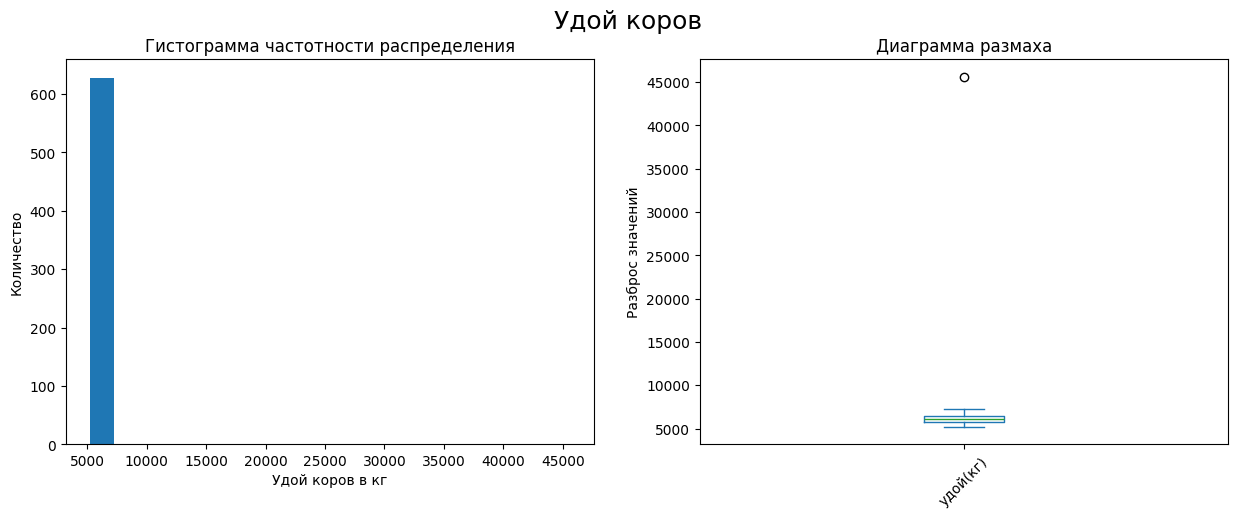

In [765]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.suptitle('Удой коров', fontsize=18)
ferma_main['удой(кг)'].plot(kind='hist', bins=20, ax=axes[0])
axes[0].set_title('Гистограмма частотности распределения')
axes[0].set_xlabel('Удой коров в кг')
axes[0].set_ylabel('Количество')

ferma_main['удой(кг)'].plot(kind='box', ax=axes[1], rot=45)
axes[1].set_ylabel('Разброс значений')
axes[1].set_title('Диаграмма размаха')
plt.show()

Как мы можем заметить, большинство значений находится на промежутке от 5750.00 кг до 6501.000 кг. По диаграмме размаха мы также видим аномально большое значение около 45.000 кг. Уберем эти выбросы и еще раз посмотрим на графики.

In [766]:
ferma_main = ferma_main.loc[ferma_main['удой(кг)'] < 10000]

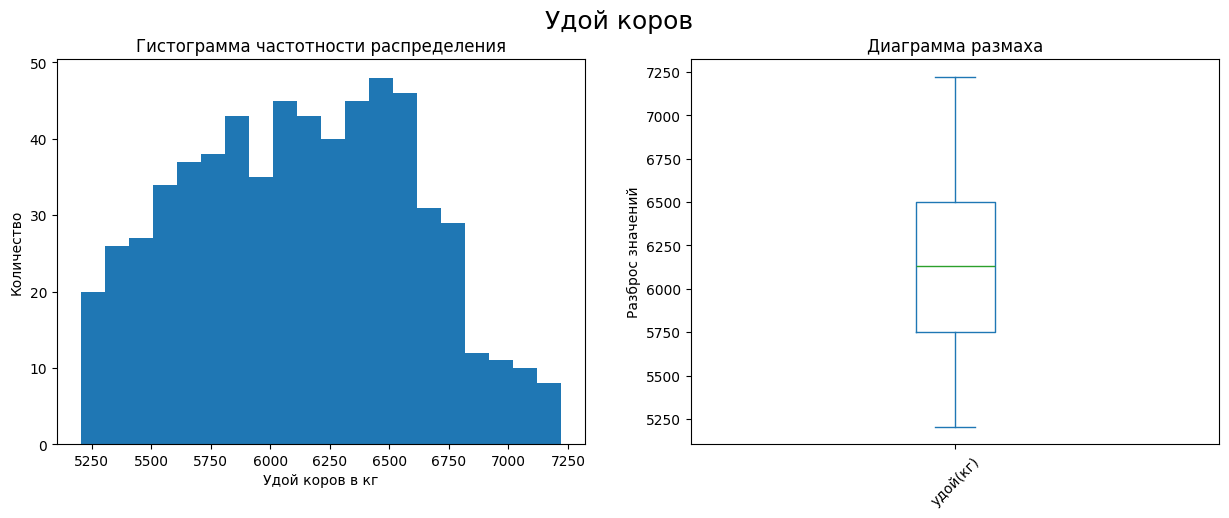

count         mean         std     min      25%     50%     75%  \
удой(кг)  628.0  6125.968153  475.857053  5204.0  5749.75  6132.5  6501.0   

             max  
удой(кг)  7222.0

In [767]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.suptitle('Удой коров', fontsize=18)
ferma_main['удой(кг)'].plot(kind='hist', bins=20, ax=axes[0])
axes[0].set_title('Гистограмма частотности распределения')
axes[0].set_xlabel('Удой коров в кг')
axes[0].set_ylabel('Количество')

ferma_main['удой(кг)'].plot(kind='box', ax=axes[1], rot=45)
axes[1].set_ylabel('Разброс значений')
axes[1].set_title('Диаграмма размаха')
plt.show()

display(ferma_main[['удой(кг)']].describe().T)

По графикам видно, что в основном значения удоя коров находятся примерно в пределах от 5200 кг до 7250 кг. Гистограмма похожа на график нормального распределения со смещением вправо.

**2) ЭКЕ (энергетическая кормовая единица)**

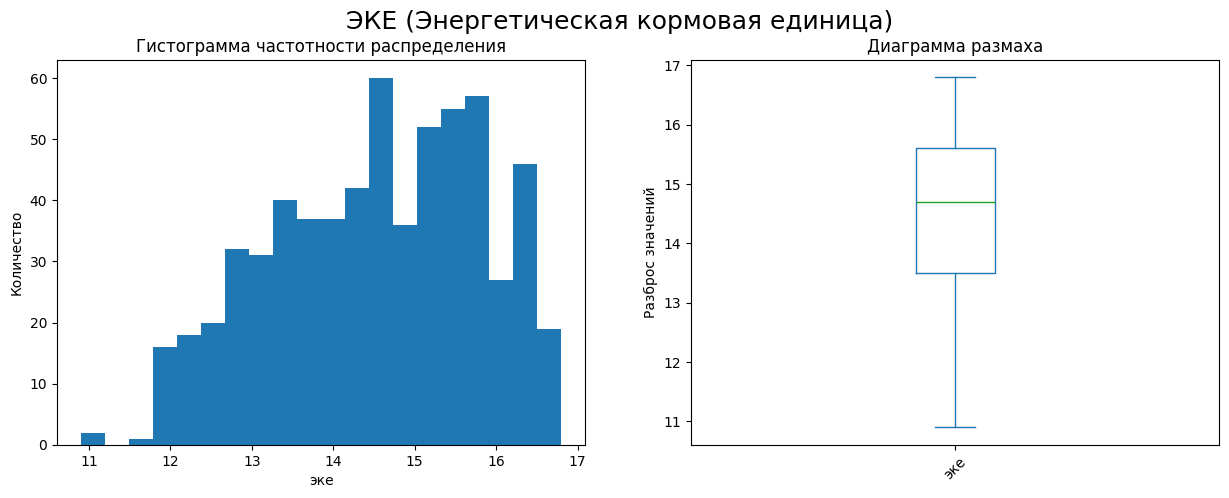

count       mean       std   min   25%   50%   75%   max
эке  628.0  14.548726  1.301777  10.9  13.5  14.7  15.6  16.8

In [768]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.suptitle('ЭКЕ (Энергетическая кормовая единица)', fontsize=18)
ferma_main['эке'].plot(kind='hist', bins=20, ax=axes[0])
axes[0].set_title('Гистограмма частотности распределения')
axes[0].set_xlabel('эке')
axes[0].set_ylabel('Количество')

ferma_main['эке'].plot(kind='box', ax=axes[1], rot=45)
axes[1].set_ylabel('Разброс значений')
axes[1].set_title('Диаграмма размаха')
plt.show()

display(ferma_main[['эке']].describe().T)

По графикам видно, что в основном значения энергетической кормовой единицы находятся примерно в пределах от 10 до 17, а большая часть значений находится на промежутке от 13.5 до 15.6. Гистограмма похожа на график нормального распределения со смещением вправо.

**3) Сырой протеин(г)**

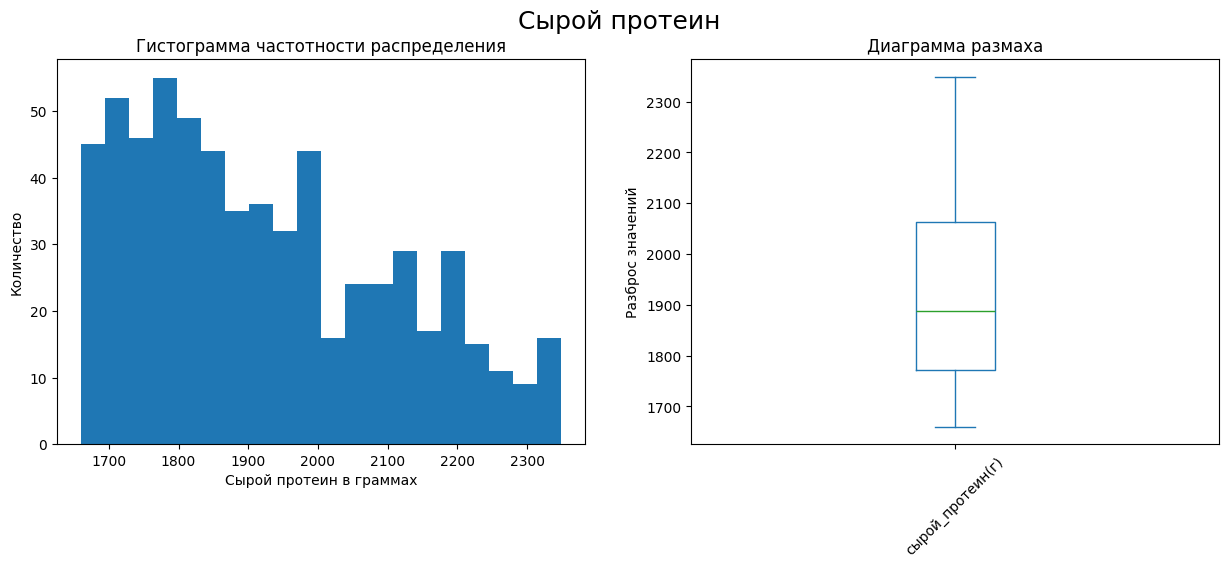

count         mean         std     min      25%     50%  \
сырой_протеин(г)  628.0  1923.759554  182.832816  1660.0  1771.75  1888.0   

                      75%     max  
сырой_протеин(г)  2062.25  2349.0

In [769]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.suptitle('Сырой протеин', fontsize=18)
ferma_main['сырой_протеин(г)'].plot(kind='hist', bins=20, ax=axes[0])
axes[0].set_title('Гистограмма частотности распределения')
axes[0].set_xlabel('Сырой протеин в граммах')
axes[0].set_ylabel('Количество')

ferma_main['сырой_протеин(г)'].plot(kind='box', ax=axes[1], rot=45)
axes[1].set_ylabel('Разброс значений')
axes[1].set_title('Диаграмма размаха')
plt.show()

display(ferma_main[['сырой_протеин(г)']].describe().T)

Как видно по диаграмме размаха в данных выбросов нет. Большая часть значений находится на промежутке примерно от 1772 грамм до 2062 грамм. Гистограмма не похожа на график нормального распределения, т.к. большинство значений находятся слева.

**4) СПО (Сахаро-протеиновое соотношение)**

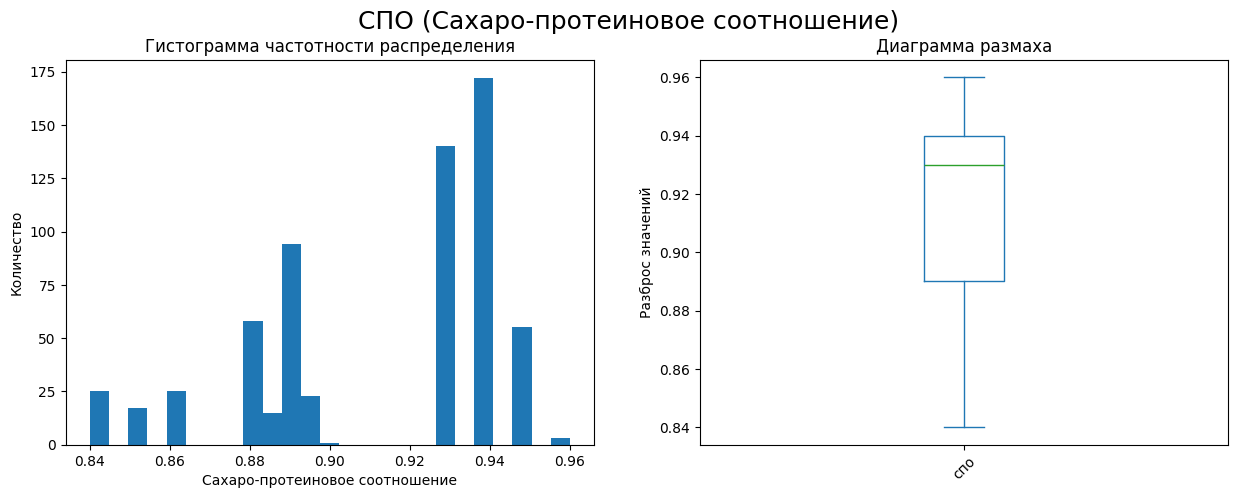

count      mean       std   min   25%   50%   75%   max
спо  628.0  0.913089  0.032221  0.84  0.89  0.93  0.94  0.96

спо
0.900      1
0.960      3
0.885     15
0.850     17
0.895     23
0.840     25
0.860     25
0.950     55
0.880     58
0.890     94
0.930    140
0.940    172
Name: count, dtype: int64


In [770]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.suptitle('СПО (Сахаро-протеиновое соотношение)', fontsize=18)
ferma_main['спо'].plot(kind='hist', bins=25, ax=axes[0])
axes[0].set_title('Гистограмма частотности распределения')
axes[0].set_xlabel('Сахаро-протеиновое соотношение')
axes[0].set_ylabel('Количество')

ferma_main['спо'].plot(kind='box', ax=axes[1], rot=45)
axes[1].set_ylabel('Разброс значений')
axes[1].set_title('Диаграмма размаха')
plt.show()

display(ferma_main[['спо']].describe().T)
print(ferma_main['спо'].value_counts().sort_values())

Как мы видим на графиках, значения находятся на промежутке от 0.84 до 0.96. Больше всего значений на показателе 0.94. Распределение не нормальное.

**5) Жирность (%)**

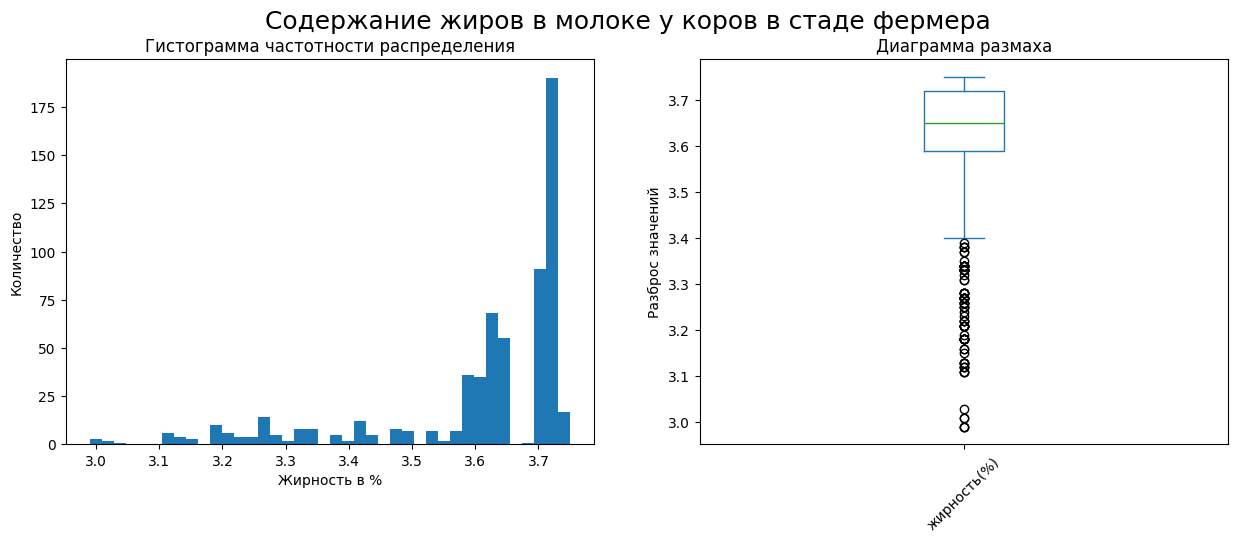

count      mean       std   min   25%   50%   75%   max
жирность(%)  628.0  3.604268  0.168093  2.99  3.59  3.65  3.72  3.75

жирность(%)
3.72    112
3.73     78
3.71     78
3.63     37
3.64     36
3.61     35
3.62     31
3.59     25
3.65     19
3.74     16
3.70     13
3.58     11
3.27     10
3.42     10
3.18      9
3.48      8
3.49      7
3.57      7
3.33      7
3.34      7
3.21      6
3.53      6
3.28      5
3.44      5
3.26      4
3.13      4
3.11      3
2.99      3
3.12      3
3.22      3
3.25      3
3.38      3
3.16      2
3.31      2
3.01      2
3.37      2
3.55      2
3.41      2
3.32      1
3.39      1
3.15      1
3.23      1
3.75      1
3.35      1
3.40      1
3.54      1
3.69      1
3.03      1
3.24      1
3.19      1
Name: count, dtype: int64


In [771]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.suptitle('Содержание жиров в молоке у коров в стаде фермера', fontsize=18)
ferma_main['жирность(%)'].plot(kind='hist', bins=40, ax=axes[0])
axes[0].set_title('Гистограмма частотности распределения')
axes[0].set_xlabel('Жирность в %')
axes[0].set_ylabel('Количество')

ferma_main['жирность(%)'].plot(kind='box', ax=axes[1], rot=45)
axes[1].set_ylabel('Разброс значений')
axes[1].set_title('Диаграмма размаха')
plt.show()

display(ferma_main[['жирность(%)']].describe().T)
print(ferma_main['жирность(%)'].value_counts())

Больше всего значений жирности молока 3.72%. Данное распределение не нормальное. Также, по диаграмме размаха видны выбросы. Уберем значения менее 3.2%

In [772]:
ferma_main = ferma_main.loc[ferma_main['жирность(%)'] > 3.2]

**6) Белок (%)**

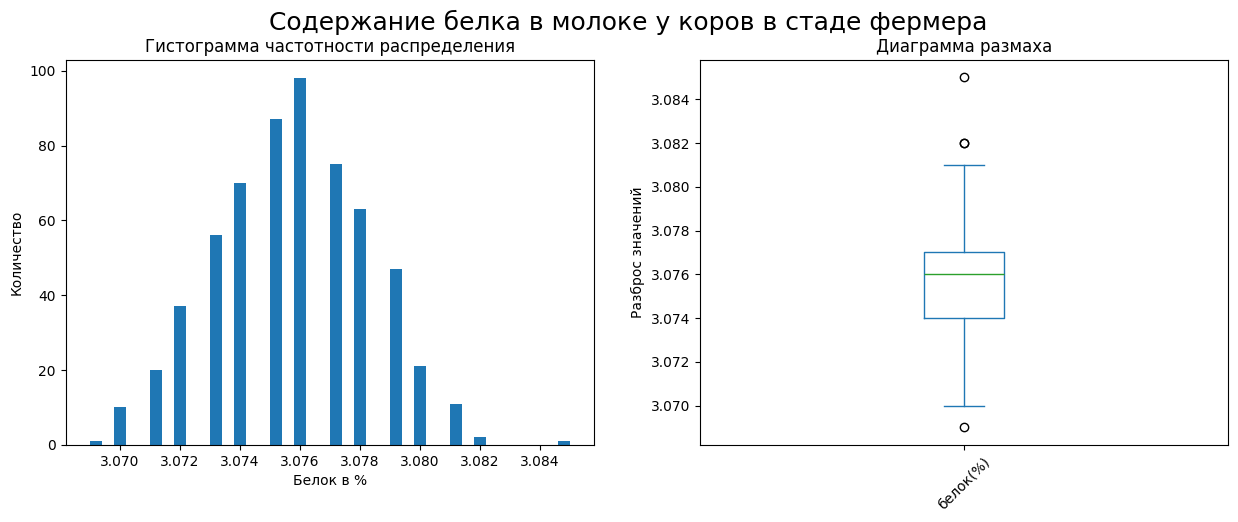

count      mean       std    min    25%    50%    75%    max
белок(%)  599.0  3.075653  0.002525  3.069  3.074  3.076  3.077  3.085

In [773]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.suptitle('Содержание белка в молоке у коров в стаде фермера', fontsize=18)
ferma_main['белок(%)'].plot(kind='hist', bins=40, ax=axes[0])
axes[0].set_title('Гистограмма частотности распределения')
axes[0].set_xlabel('Белок в %')
axes[0].set_ylabel('Количество')

ferma_main['белок(%)'].plot(kind='box', ax=axes[1], rot=45)
axes[1].set_ylabel('Разброс значений')
axes[1].set_title('Диаграмма размаха')
plt.show()

display(ferma_main[['белок(%)']].describe().T)

По графикам видно, что в основном значения белка находятся в пределах от 3.069 % до 3.085 %, а большая часть значений находится на промежутке от 3.074 до 3.077. Больше всего значений находится на 3.076%. Гистограмма похожа на график нормального распределения. Также, в данных присутсвуют выбросы но значения кажутся реалистичными, поэтому удалять их не будем.

**7) Текущая жирность (%)**

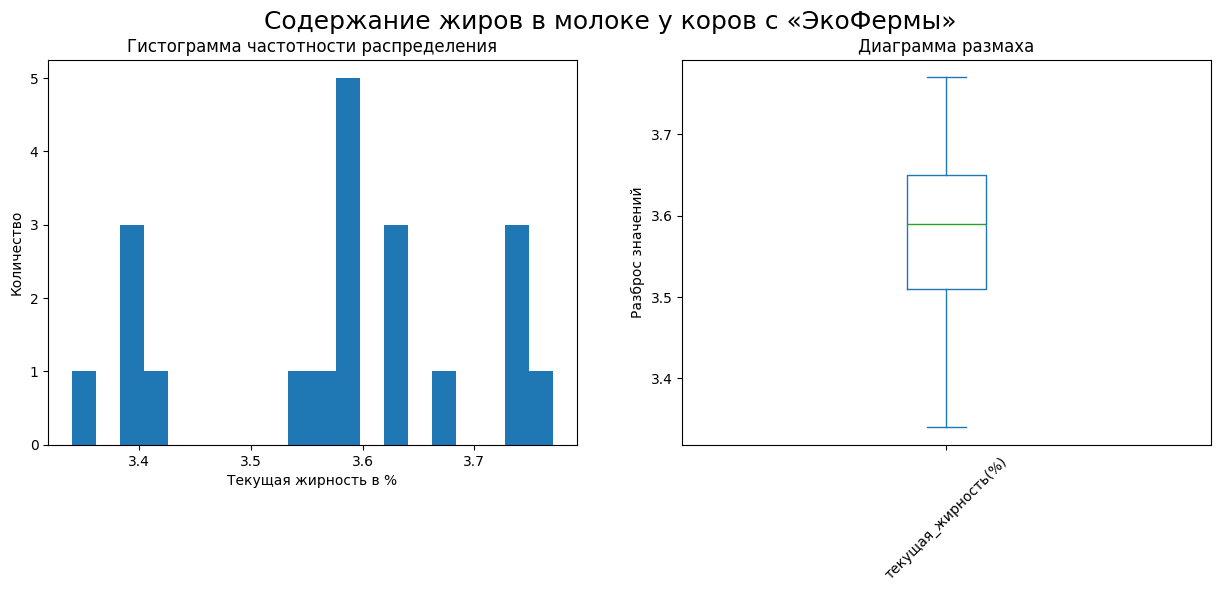

count    mean       std   min   25%   50%   75%   max
текущая_жирность(%)   20.0  3.5775  0.126818  3.34  3.51  3.59  3.65  3.77

In [774]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.suptitle('Содержание жиров в молоке у коров с «ЭкоФермы»', fontsize=18)
cow_buy['текущая_жирность(%)'].plot(kind='hist', bins=20, ax=axes[0])
axes[0].set_title('Гистограмма частотности распределения')
axes[0].set_xlabel('Текущая жирность в %')
axes[0].set_ylabel('Количество')

cow_buy['текущая_жирность(%)'].plot(kind='box', ax=axes[1], rot=45)
axes[1].set_ylabel('Разброс значений')
axes[1].set_title('Диаграмма размаха')
plt.show()

display(cow_buy[['текущая_жирность(%)']].describe().T)

Из данных двух графиков следует, что в данных нет аномальных значений.

**8) Текущий белок (%)**

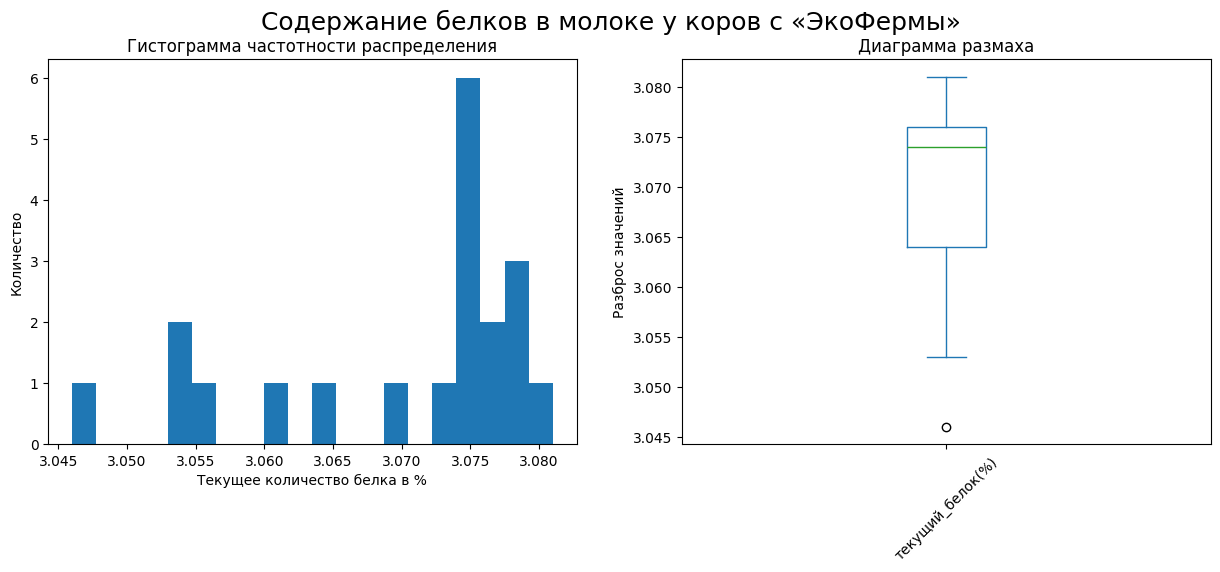

count    mean       std    min    25%    50%    75%    max
текущий_белок(%)   20.0  3.0695  0.010339  3.046  3.064  3.074  3.076  3.081

In [775]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.suptitle('Содержание белков в молоке у коров с «ЭкоФермы»', fontsize=18)
cow_buy['текущий_белок(%)'].plot(kind='hist', bins=20, ax=axes[0])
axes[0].set_title('Гистограмма частотности распределения')
axes[0].set_xlabel('Текущее количество белка в %')
axes[0].set_ylabel('Количество')

cow_buy['текущий_белок(%)'].plot(kind='box', ax=axes[1], rot=45)
axes[1].set_ylabel('Разброс значений')
axes[1].set_title('Диаграмма размаха')
plt.show()

display(cow_buy[['текущий_белок(%)']].describe().T)

Также, как и выше, в данных нет аномальных значений.

Далее, проведем статистический анализ категориальных признаков для всех датасетов

**1) Порода коровы**

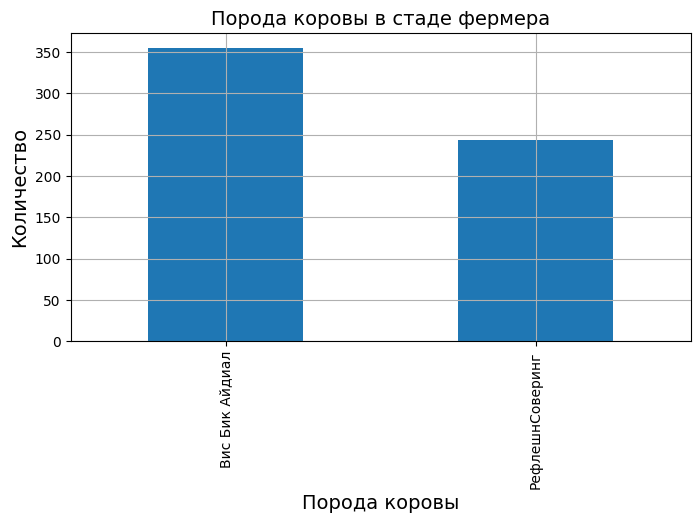

count                599
unique                 2
top       Вис Бик Айдиал
freq                 355
Name: порода, dtype: object

порода
Вис Бик Айдиал     355
РефлешнСоверинг    244
Name: count, dtype: int64


In [776]:
ferma_main['порода'].value_counts().plot.bar(grid=True, figsize=(8, 4))
plt.xlabel('Порода коровы', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.title('Порода коровы в стаде фермера', fontsize=14)
plt.show()
print(ferma_main['порода'].describe())
print()
print(ferma_main['порода'].value_counts())

В стаде у фермера всего 2 породы коров. Большее количество коров породы Вис Бик Айдиал равное 355, а РефлешнСоверинг их 244.

**2) Тип пастбища**

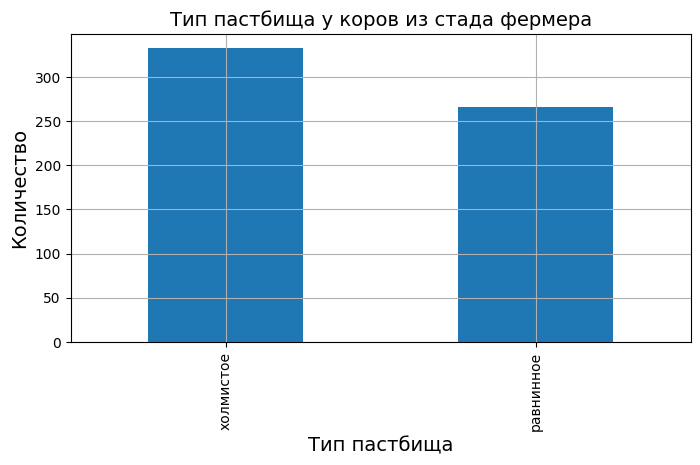

count           599
unique            2
top       холмистое
freq            333
Name: тип_пастбища, dtype: object

тип_пастбища
холмистое    333
равнинное    266
Name: count, dtype: int64


In [777]:
ferma_main['тип_пастбища'].value_counts().plot.bar(grid=True, figsize=(8, 4))
plt.xlabel('Тип пастбища', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.title('Тип пастбища у коров из стада фермера', fontsize=14)
plt.show()
print(ferma_main['тип_пастбища'].describe())
print()
print(ferma_main['тип_пастбища'].value_counts())

Коров, которые пасутся на холмистом пастбище больше, чем на равнинном.

**3) Порода папы коровы**

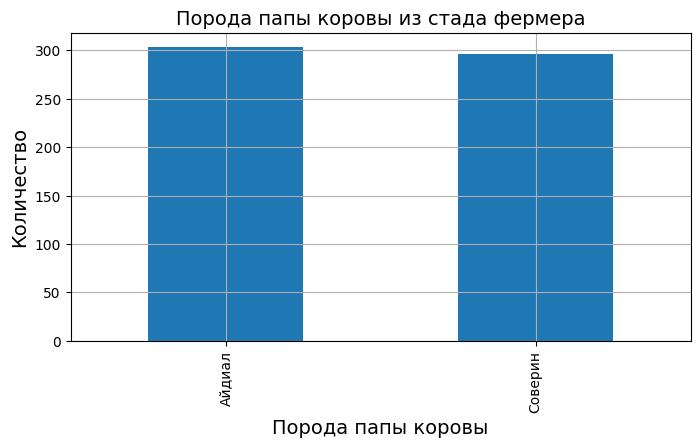

count        599
unique         2
top       Айдиал
freq         303
Name: порода_папы_быка, dtype: object

порода_папы_быка
Айдиал     303
Соверин    296
Name: count, dtype: int64


In [778]:
ferma_main['порода_папы_быка'].value_counts().plot.bar(grid=True, figsize=(8, 4))
plt.xlabel('Порода папы коровы', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.title('Порода папы коровы из стада фермера', fontsize=14)
plt.show()
print(ferma_main['порода_папы_быка'].describe())
print()
print(ferma_main['порода_папы_быка'].value_counts())

Количество коров, у которых папа бык был породы Айдиал почти такое же, как и у которых папа бык был породы Соверин.

**4) Вкус молока**

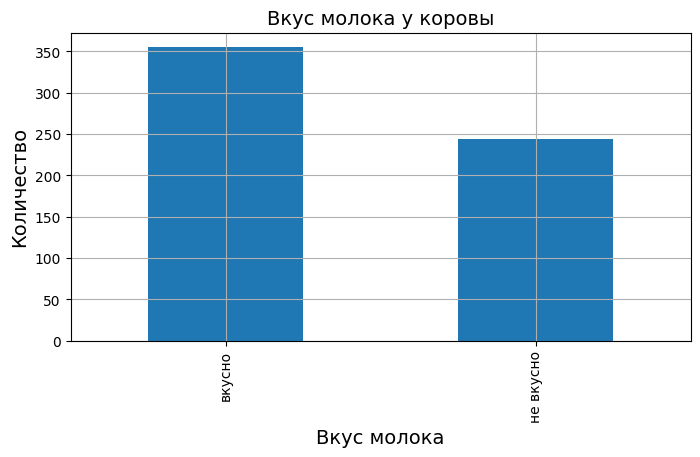

count        599
unique         2
top       вкусно
freq         355
Name: вкус_молока, dtype: object

вкус_молока
вкусно       355
не вкусно    244
Name: count, dtype: int64


In [779]:
ferma_main['вкус_молока'].value_counts().plot.bar(grid=True, figsize=(8, 4))
plt.xlabel('Вкус молока', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.title('Вкус молока у коровы', fontsize=14)
plt.show()
print(ferma_main['вкус_молока'].describe())
print()
print(ferma_main['вкус_молока'].value_counts())

По мнению фермера у его коров больше вкусного молока, чем не вкусного.

**5) Возраст коровы**

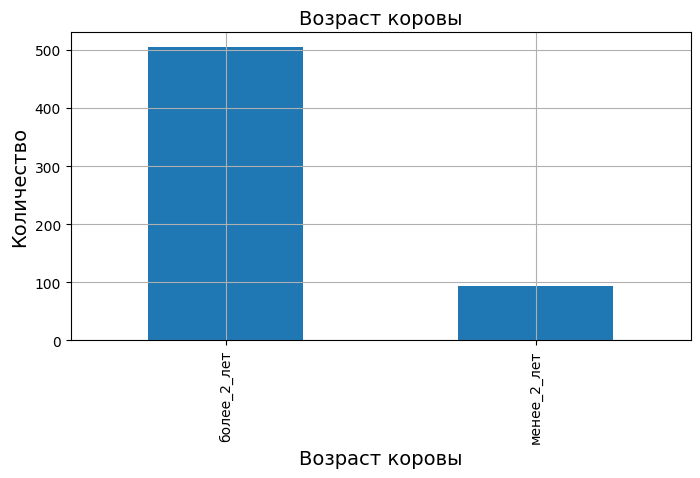

count             599
unique              2
top       более_2_лет
freq              505
Name: возраст, dtype: object

возраст
более_2_лет    505
менее_2_лет     94
Name: count, dtype: int64


In [780]:
ferma_main['возраст'].value_counts().plot.bar(grid=True, figsize=(8, 4))
plt.xlabel('Возраст коровы', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.title('Возраст коровы', fontsize=14)
plt.show()
print(ferma_main['возраст'].describe())
print()
print(ferma_main['возраст'].value_counts())

В стаде у фермера количество коров, которым больше 2 лет, больше в 5 раз, недели коров, которым менее 2х лет

**6) Имя папы коровы**

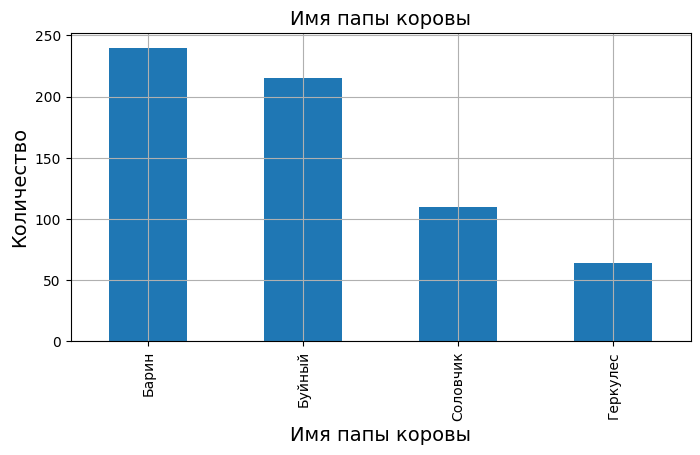

count       629
unique        4
top       Барин
freq        240
Name: имя_папы, dtype: object

имя_папы
Барин       240
Буйный      215
Соловчик    110
Геркулес     64
Name: count, dtype: int64


In [781]:
ferma_dad['имя_папы'].value_counts().plot.bar(grid=True, figsize=(8, 4))
plt.xlabel('Имя папы коровы', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.title('Имя папы коровы', fontsize=14)
plt.show()
print(ferma_dad['имя_папы'].describe())
print()
print(ferma_dad['имя_папы'].value_counts())

Больше всего было коров от быка Барин, а меньше всего от Геркулеса.

**7) Порода коровы у «ЭкоФермы»**

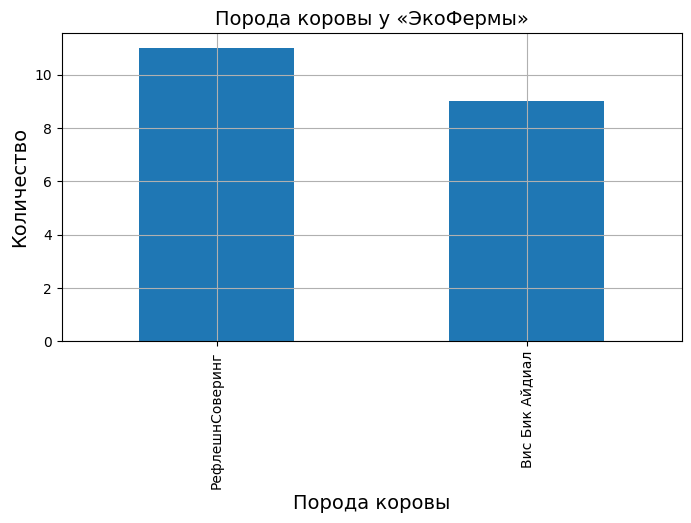

count                  20
unique                  2
top       РефлешнСоверинг
freq                   11
Name: порода, dtype: object

порода
РефлешнСоверинг    11
Вис Бик Айдиал      9
Name: count, dtype: int64


In [782]:
cow_buy['порода'].value_counts().plot.bar(grid=True, figsize=(8, 4))
plt.xlabel('Порода коровы', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.title('Порода коровы у «ЭкоФермы»', fontsize=14)
plt.show()
print(cow_buy['порода'].describe())
print()
print(cow_buy['порода'].value_counts())

У ЭкоФермы» количество коров породы РефлешнСоверинг чуть больше, чем породы Вис Бик Айдиал

**8) Тип пастбища у коров «ЭкоФермы»**

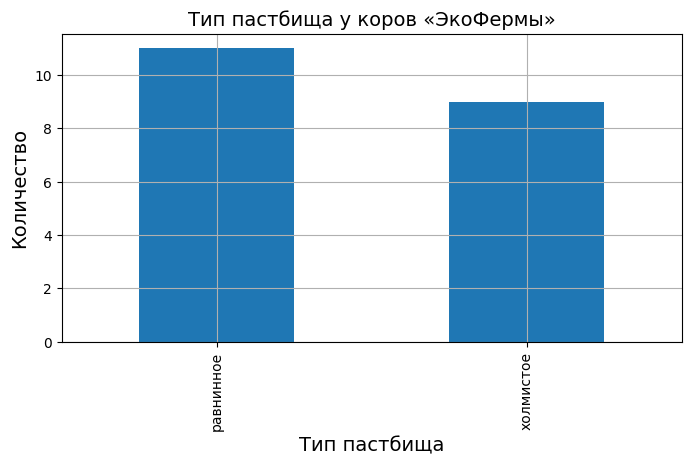

count            20
unique            2
top       равнинное
freq             11
Name: тип_пастбища, dtype: object

тип_пастбища
равнинное    11
холмистое     9
Name: count, dtype: int64


In [783]:
cow_buy['тип_пастбища'].value_counts().plot.bar(grid=True, figsize=(8, 4))
plt.xlabel('Тип пастбища', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.title('Тип пастбища у коров «ЭкоФермы»', fontsize=14)
plt.show()
print(cow_buy['тип_пастбища'].describe())
print()
print(cow_buy['тип_пастбища'].value_counts())

Как и было выше, количество коров у «ЭкоФермы», которые пасутся на равнинном пастбище такое же, как и количество коров, которые пасутся на холмистом

**9) Порода папы у коров «ЭкоФермы»**

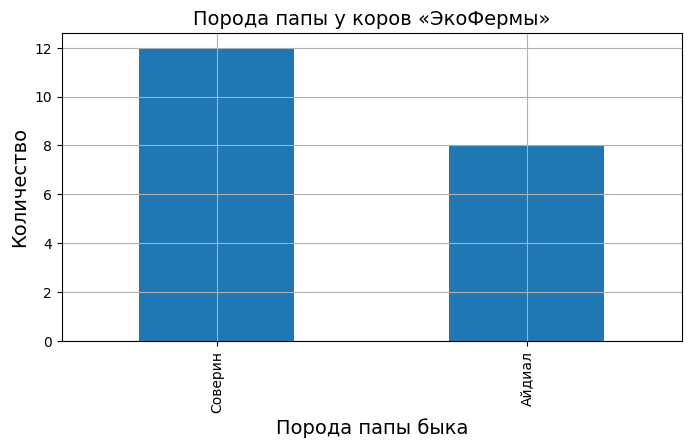

count          20
unique          2
top       Соверин
freq           12
Name: порода_папы_быка, dtype: object

порода_папы_быка
Соверин    12
Айдиал      8
Name: count, dtype: int64


In [784]:
cow_buy['порода_папы_быка'].value_counts().plot.bar(grid=True, figsize=(8, 4))
plt.xlabel('Порода папы быка', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.title('Порода папы у коров «ЭкоФермы»', fontsize=14)
plt.show()
print(cow_buy['порода_папы_быка'].describe())
print()
print(cow_buy['порода_папы_быка'].value_counts())

Количество коров, у которых папа бык был породы Соверин больше, чем у которых папа бык был породы Айдиал.

**10) Имя папы у коров «ЭкоФермы»**

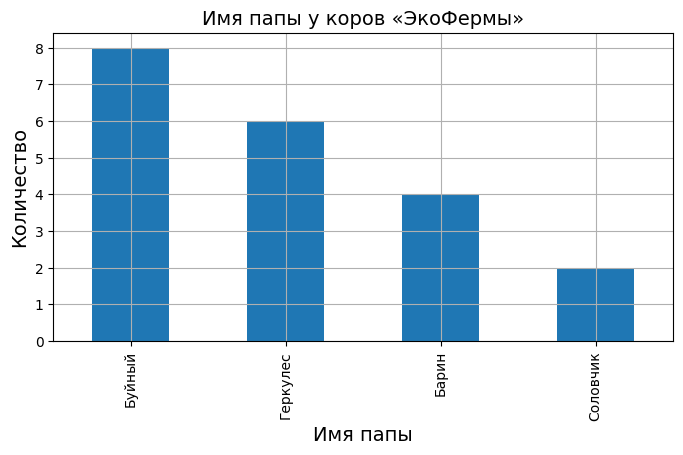

count         20
unique         4
top       Буйный
freq           8
Name: имя_папы, dtype: object

имя_папы
Буйный      8
Геркулес    6
Барин       4
Соловчик    2
Name: count, dtype: int64


In [785]:
cow_buy['имя_папы'].value_counts().plot.bar(grid=True, figsize=(8, 4))
plt.xlabel('Имя папы', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.title('Имя папы у коров «ЭкоФермы»', fontsize=14)
plt.show()
print(cow_buy['имя_папы'].describe())
print()
print(cow_buy['имя_папы'].value_counts())

Больше всего коров от быка по имени Буйный - 7 штук. Меньше всего коров от быков по имени Барин и Соловчик - 2 коровы

**11) Возраст коров «ЭкоФермы»**

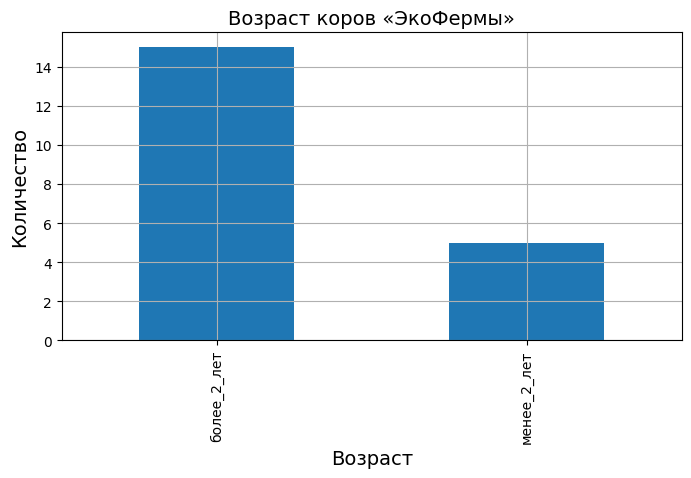

count              20
unique              2
top       более_2_лет
freq               15
Name: возраст, dtype: object

возраст
более_2_лет    15
менее_2_лет     5
Name: count, dtype: int64


In [786]:
cow_buy['возраст'].value_counts().plot.bar(grid=True, figsize=(8, 4))
plt.xlabel('Возраст', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.title('Возраст коров «ЭкоФермы»', fontsize=14)
plt.show()
print(cow_buy['возраст'].describe())
print()
print(cow_buy['возраст'].value_counts())

Коров страше 2х лет больше в 3 раза, чем коров, которые младше 2х лет.

Итак, в третьей части работы мы рассмотрели все количественные и категориальные признаки во всех датасетах.

Количественные признаки:
- в датафрейме ferma_main 1) У признака **'удой (кг)'** имеется аномальное значение приблизительно равное 45.000 кг молока, которое в последствии мы удалили. Также график выглядит как график нормального распределения. 2) У признака **'эке'** по диаграмме размаха выбросов нет. Также, гистограмма похожа на график нормального распределения со смещением вправо. 3) У признака **'сырой протеин (г)'** как видно по диаграмме размаха в данных выбросов нет. Гистограмма не похожа на график нормального распределения. 4) У признака **'спо'** выбросов нет, и на графике мы видим не нормальное распределение. 5) У признака **'жирность (%)'** по диаграмме размаха мы видим множество выбрасов. Мы убрали все значения меньше 3.2% жирности молока. Также, как мы можем заметить, гистограмма не похожа на график нормального распределения. 6) У признака **'белок (%)'** присутсвуют выбросы в небольшом количестве, поэтому мы их удалили. Гистограмма же похожа на график нормального распределения.
- в датафрейме ferma_dad их нет
- в датафрейме cow_buy 7) У признака **'текущая жирность (%)** из графиков следует, что в данных нет аномальных значений. Это объясняется тем, что датафрейм состоит из небольшого количества данных. 8) У признака **'текущий белок (%)'** в данных нет аномальных значений по той же причине что и у жирности.

Категориальные признаки:
- в датафрейме ferma_main 1) У признака **'порода'** большее количество коров породы Вис Бик Айдиал равное 355, а РефлешнСоверинг их 244. 2) У признака **'тип пастбища'** коров, которые пасутся на холмистом пастбище больше, чем на равнинном. 3) У признака **'порода папы быка'** количество коров, у которых папа бык был породы Айдиал почти такое же, как и у которых папа бык был породы Соверин. 4) У признака **'вкус молока'** , по мнению фермера, у его коров больше вкусного молока, чем не вкусного. 5) У признака **'возраст'** количество коров, которым больше 2 лет, больше в 5 раз, недели коров, которым менее 2х лет.
- в датафрейме ferma_dad 6) У признака **'имя папы'** больше всего у фермера было коров от быка Барин, а меньше всего от Геркулеса.
- в датафрейме cow_buy 7) У признака **'порода'** у ЭкоФермы» количество коров породы РефлешнСоверинг чуть больше , чем породы Вис Бик Айдиал. 8) У признака **'тип пастбища'** количество коров у «ЭкоФермы», которые пасутся на равнинном пастбище такое же, как и количество коров, которые пасутся на холмистом 9) У признака **'порода папы быка'** количество коров, у которых папа бык был породы Соверин больше, чем у которых папа бык был породы Айдиал. 10) У признака **'имя папы'** больше всего коров от быка по имени Буйный - 8 коров. Меньше всего коров от быков по имени Барин и Соловчик - 2 коровы 11) У признака **'возраст'** коров страше 2х лет больше в 3 раза, чем коров, которые младше 2х лет.

Улучшить данные можно посредсвом устранения выбрасов там, где они присутсвуют, тем самым информация будет более корректной.

## Корреляционный анализ

Далее, проведем корреляционный анализ количественных признаков в датасете ferma_main.csv. Целевым признаком является Удой

**Взаимосвязь ЭКЕ и Удоя**

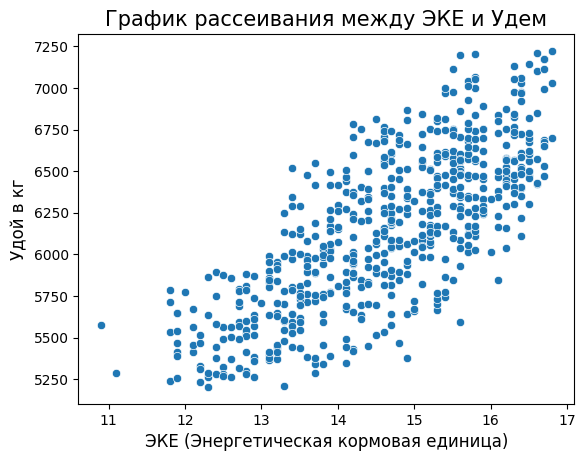


Коэффициент корреляции Спирмена:  0.7528535468906666
P-value:  1.554040245179265e-110


In [787]:
#график рассеивания между ЭКЕ и Удоем
sns.scatterplot(data=ferma_main, x='эке', y='удой(кг)')
plt.xlabel('ЭКЕ (Энергетическая кормовая единица)', fontsize=12)
plt.ylabel('Удой в кг', fontsize=12)
plt.title('График рассеивания между ЭКЕ и Удем', fontsize=15)
plt.show()
print()
rho, p = spearmanr(ferma_main['удой(кг)'], ferma_main['эке'])
print('Коэффициент корреляции Спирмена: ', rho)
print('P-value: ', p)

Распределение значений не является нормальным, поэтому мы принимаем решение о выборе коэффициента ранговой корреляции r-Спирмена. Между рассматриваемыми признаками наблюдается высокая корреляция

**Взаимосвязь Сырой протеина и Удоя**

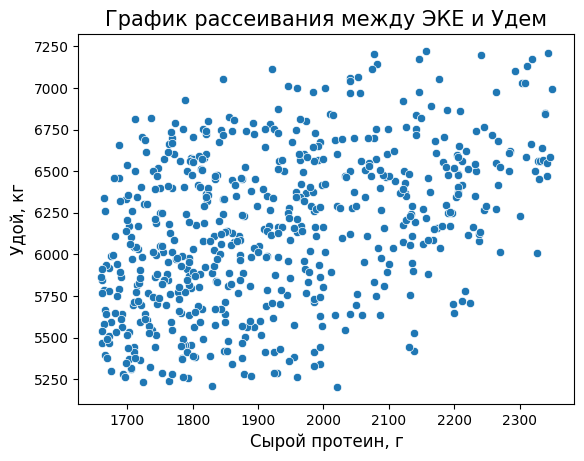


Коэффициент корреляции Спирмена:  0.4193080099722839
P-value:  6.616312718135913e-27


In [788]:
#график рассеивания между Сырой протеин и Удем
sns.scatterplot(data=ferma_main, x='сырой_протеин(г)', y='удой(кг)')
plt.xlabel('Сырой протеин, г', fontsize=12)
plt.ylabel('Удой, кг', fontsize=12)
plt.title('График рассеивания между ЭКЕ и Удем', fontsize=15)
plt.show()
print()
rho, p = spearmanr(ferma_main['удой(кг)'], ferma_main['сырой_протеин(г)'])
print('Коэффициент корреляции Спирмена: ', rho)
print('P-value: ', p)

По шкале Чеддока между рассматриваемыми признаками наблюдается умеренная корреляция

**Взаимосвязь СПО (Сахаро-протеиновое соотношение) и Удоя**

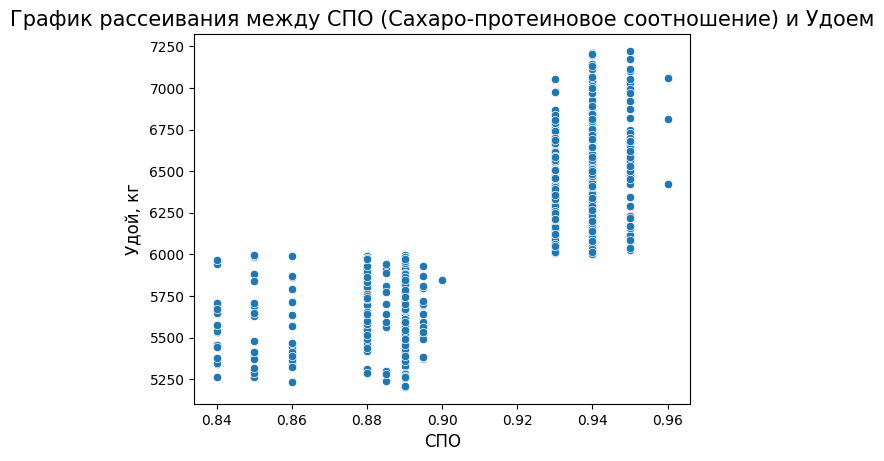


Коэффициент корреляции Спирмена:  0.777750693039098
P-value:  1.7408967794775495e-122


In [789]:
#график рассеивания между СПО (Сахаро-протеиновое соотношение) и Удем
sns.scatterplot(data=ferma_main, x='спо', y='удой(кг)')
plt.xlabel('СПО', fontsize=12)
plt.ylabel('Удой, кг', fontsize=12)
plt.title('График рассеивания между СПО (Сахаро-протеиновое соотношение) и Удоем', fontsize=15)
plt.show()
print()
rho, p = spearmanr(ferma_main['удой(кг)'], ferma_main['спо'])
print('Коэффициент корреляции Спирмена: ', rho)
print('P-value: ', p)

График скорее нелинейный, потому что у него есть явная точка перегиба в 0.9, после которой функция начинает расти. По коэффициенту корреляции видно, что между рассматриваемыми признаками наблюдается высокая корреляция

**Взаимосвязь Жирности и Удоя**

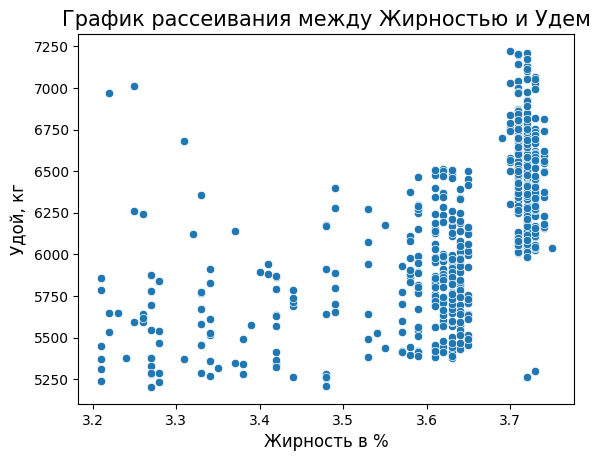


Коэффициент корреляции Спирмена:  0.6675884615973268
P-value:  1.592975517858852e-78


In [790]:
#график рассеивания между Жирностью и Удем
sns.scatterplot(data=ferma_main, x='жирность(%)', y='удой(кг)')
plt.xlabel('Жирность в %', fontsize=12)
plt.ylabel('Удой, кг', fontsize=12)
plt.title('График рассеивания между Жирностью и Удем', fontsize=15)
plt.show()
print()
rho, p = spearmanr(ferma_main['удой(кг)'], ferma_main['жирность(%)'])
print('Коэффициент корреляции Спирмена: ', rho)
print('P-value: ', p)

По шкале Чеддока между рассматриваемыми признаками наблюдается заметная корреляция

**Взаимосвязь Белка и Удоя**

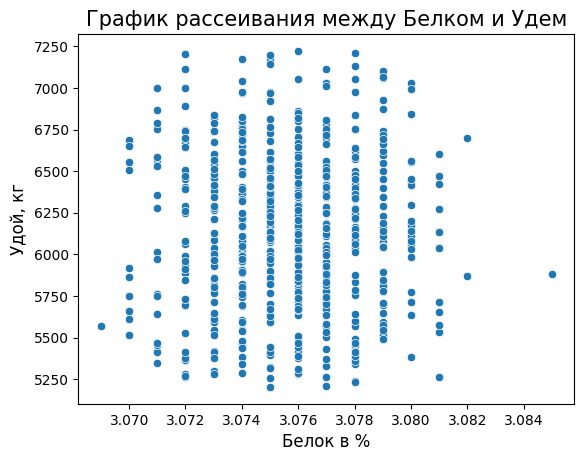


Коэффициент корреляции Спирмена:  -0.008026076333469289
P-value:  0.8445891432856028


In [791]:
#график рассеивания между Белком и Удем
sns.scatterplot(data=ferma_main, x='белок(%)', y='удой(кг)')
plt.xlabel('Белок в %', fontsize=12)
plt.ylabel('Удой, кг', fontsize=12)
plt.title('График рассеивания между Белком и Удем', fontsize=15)
plt.show()
print()
rho, p = spearmanr(ferma_main['удой(кг)'], ferma_main['белок(%)'])
print('Коэффициент корреляции Спирмена: ', rho)
print('P-value: ', p)

Как видно из графика и посчитанного коэффициента, мужду рассматриваемыми признаками нет корреляции

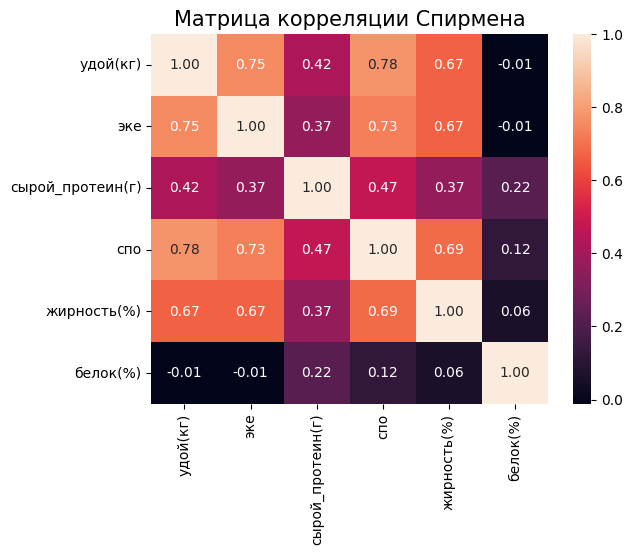

In [792]:
corr, p = spearmanr(ferma_main['удой(кг)'], ferma_main[['эке','сырой_протеин(г)', 'спо', 'жирность(%)', 'белок(%)']])
column = ['удой(кг)', 'эке','сырой_протеин(г)', 'спо', 'жирность(%)', 'белок(%)']
sns.heatmap(corr, annot=True, fmt='.2f', xticklabels=column, yticklabels=column) 
plt.title('Матрица корреляции Спирмена', fontsize=15)
plt.show()

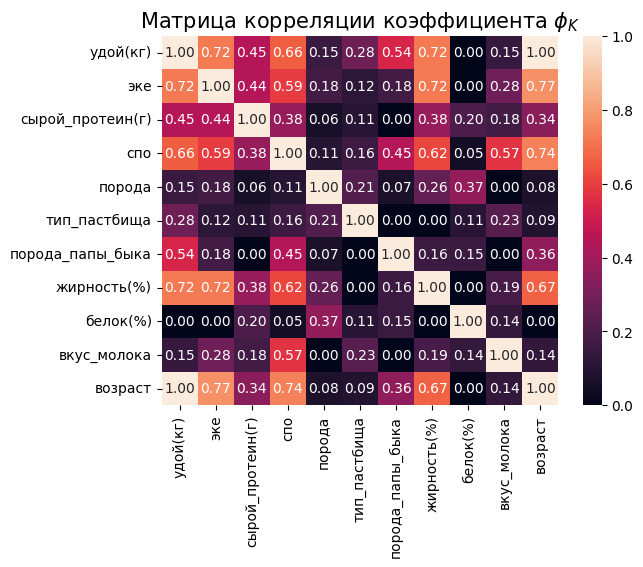

In [793]:
# построим матрицу корреляции коэффициента Фи'
ferma_main_phik = ferma_main.loc[:,'удой(кг)':].phik_matrix(['удой(кг)', 'эке','сырой_протеин(г)', 'спо', 'жирность(%)', 'белок(%)'])
sns.heatmap(ferma_main_phik, annot=True, fmt='.2f') 
plt.title('Матрица корреляции коэффициента $\phi_K$', fontsize=15)
plt.show()

При проведении корреляционного анализа количественных признаков в датасете сначала мы расчитали коэффициента корреляции Спирмена, а потом также посчитали Фи корреляцию и получили приблизительно похожие значения.

Судя по тепловой карте и графикам, самая сильная прямая связь с целевым признаком 'Удой' у входных признаков 'ЭКЕ', 'СПО' и 'Жирность(%)'. С признаком 'Сырой протеин' взамосвязь также имеется, хоть и немного меньше. С 'Белком' у 'Удоя' при расчете коэффициетна Спирмена взаимосвязи никакой нет. Однако, при расчете коэффициента корреляции Фи взамосвязь между двумя признаками увеличиваеися, но все же остается слабой.

Далее, проведем корреляционный анализ признаков и построим диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков.

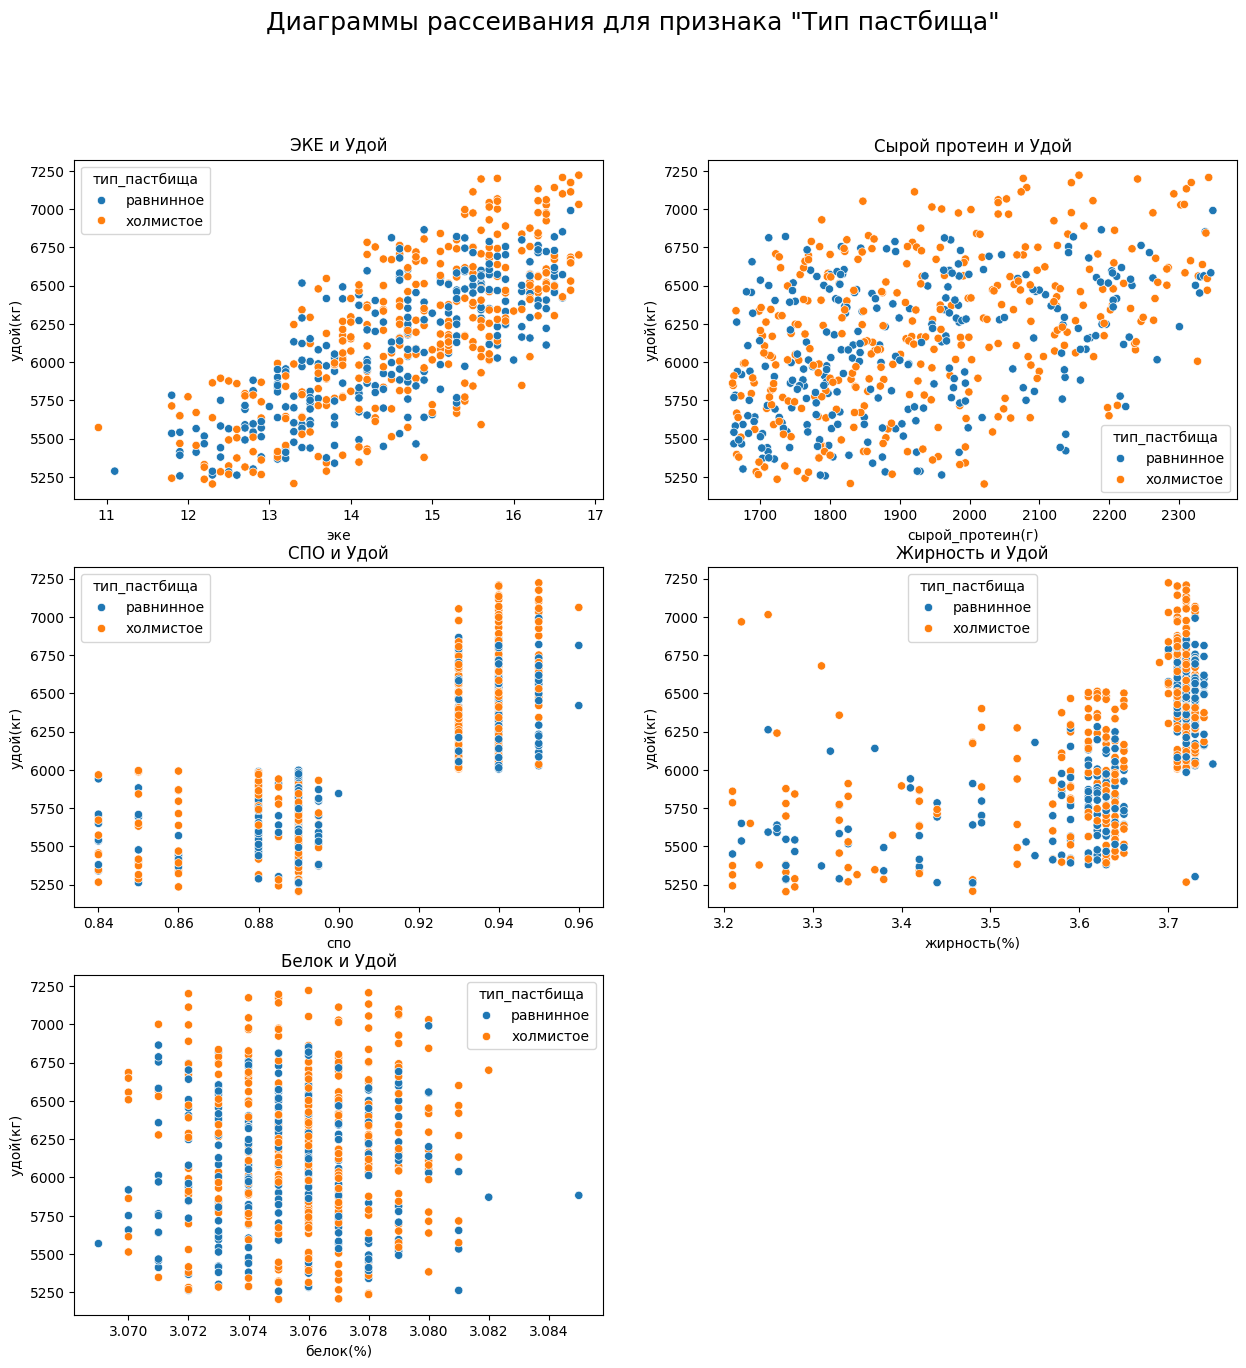

In [794]:
#построим диаграмму рассеивания для признака "Тип пастбища"
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
fig.suptitle('Диаграммы рассеивания для признака "Тип пастбища" ', fontsize=18)

sns.scatterplot(data=ferma_main, x='эке', y='удой(кг)', hue='тип_пастбища', ax=axes[0,0])
axes[0,0].set_title('ЭКЕ и Удой')

sns.scatterplot(data=ferma_main, x='сырой_протеин(г)', y='удой(кг)', hue='тип_пастбища', ax=axes[0,1])
axes[0,1].set_title('Сырой протеин и Удой')

sns.scatterplot(data=ferma_main, x='спо', y='удой(кг)', hue='тип_пастбища', ax=axes[1,0])
axes[1,0].set_title('СПО и Удой')

sns.scatterplot(data=ferma_main, x='жирность(%)', y='удой(кг)', hue='тип_пастбища', ax=axes[1,1])
axes[1,1].set_title('Жирность и Удой')

sns.scatterplot(data=ferma_main, x='белок(%)', y='удой(кг)', hue='тип_пастбища', ax=axes[2,0])
axes[2,0].set_title('Белок и Удой')

axes[2,1].remove()

plt.show()

По графикам видно, что прослеживается линейная связь между Удоем с ЭКЕ и Сырым протеином. Графики же с СПО, Жирностью и Белком не связаны линейно. Можно предположить, что данные могут принимать только фиксированные значения (поэтому располагаются 'столбиками'). Также, мы можем заметить, что больше всего удоя у тех коров, которые паслись на холмистом пастбище.

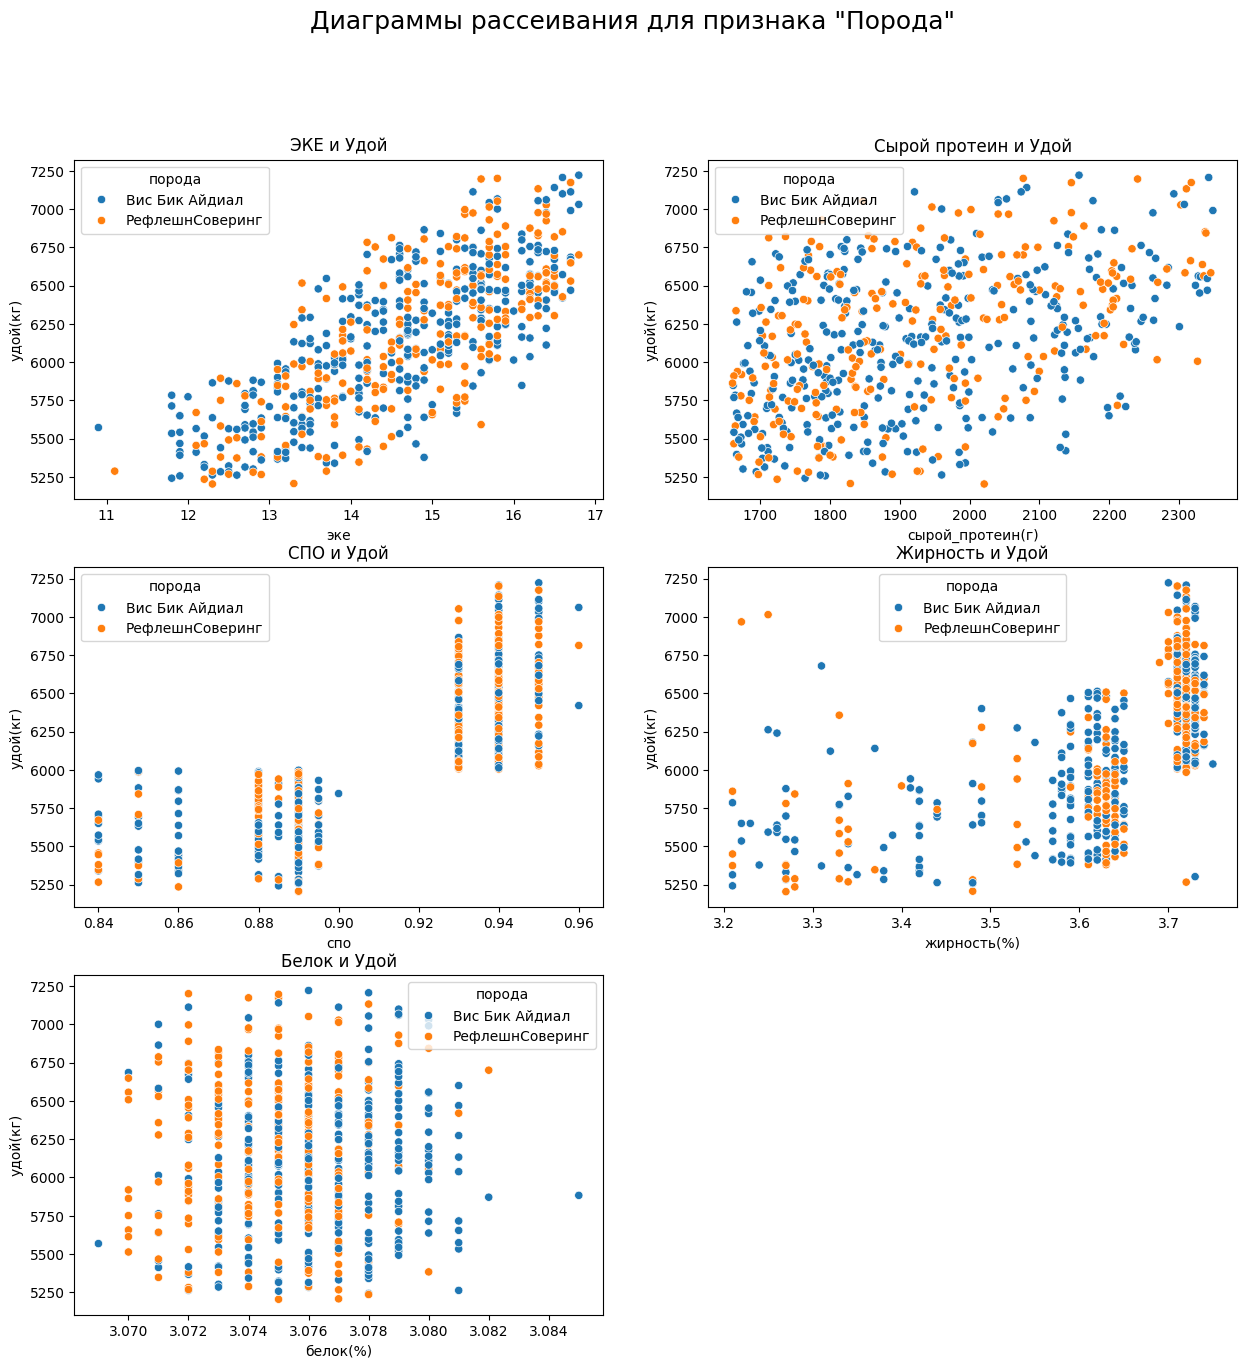

In [795]:
#построим диаграмму рассеивания для признака "Порода"
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
fig.suptitle('Диаграммы рассеивания для признака "Порода" ', fontsize=18)

sns.scatterplot(data=ferma_main, x='эке', y='удой(кг)', hue='порода', ax=axes[0,0])
axes[0,0].set_title('ЭКЕ и Удой')

sns.scatterplot(data=ferma_main, x='сырой_протеин(г)', y='удой(кг)', hue='порода', ax=axes[0,1])
axes[0,1].set_title('Сырой протеин и Удой')

sns.scatterplot(data=ferma_main, x='спо', y='удой(кг)', hue='порода', ax=axes[1,0])
axes[1,0].set_title('СПО и Удой')

sns.scatterplot(data=ferma_main, x='жирность(%)', y='удой(кг)', hue='порода', ax=axes[1,1])
axes[1,1].set_title('Жирность и Удой')

sns.scatterplot(data=ferma_main, x='белок(%)', y='удой(кг)', hue='порода', ax=axes[2,0])
axes[2,0].set_title('Белок и Удой')

axes[2,1].remove()

plt.show()

На данных графиках мы можем заметить слабую линейную зависимость Удоя только с ЭКЕ. В этот раз у Сырого протеина данные разбросаны хаотично, а на графиках с СПО, Жирностью и Белком нет линейной зависимости. Также, разницы между породами почти никакой нет.

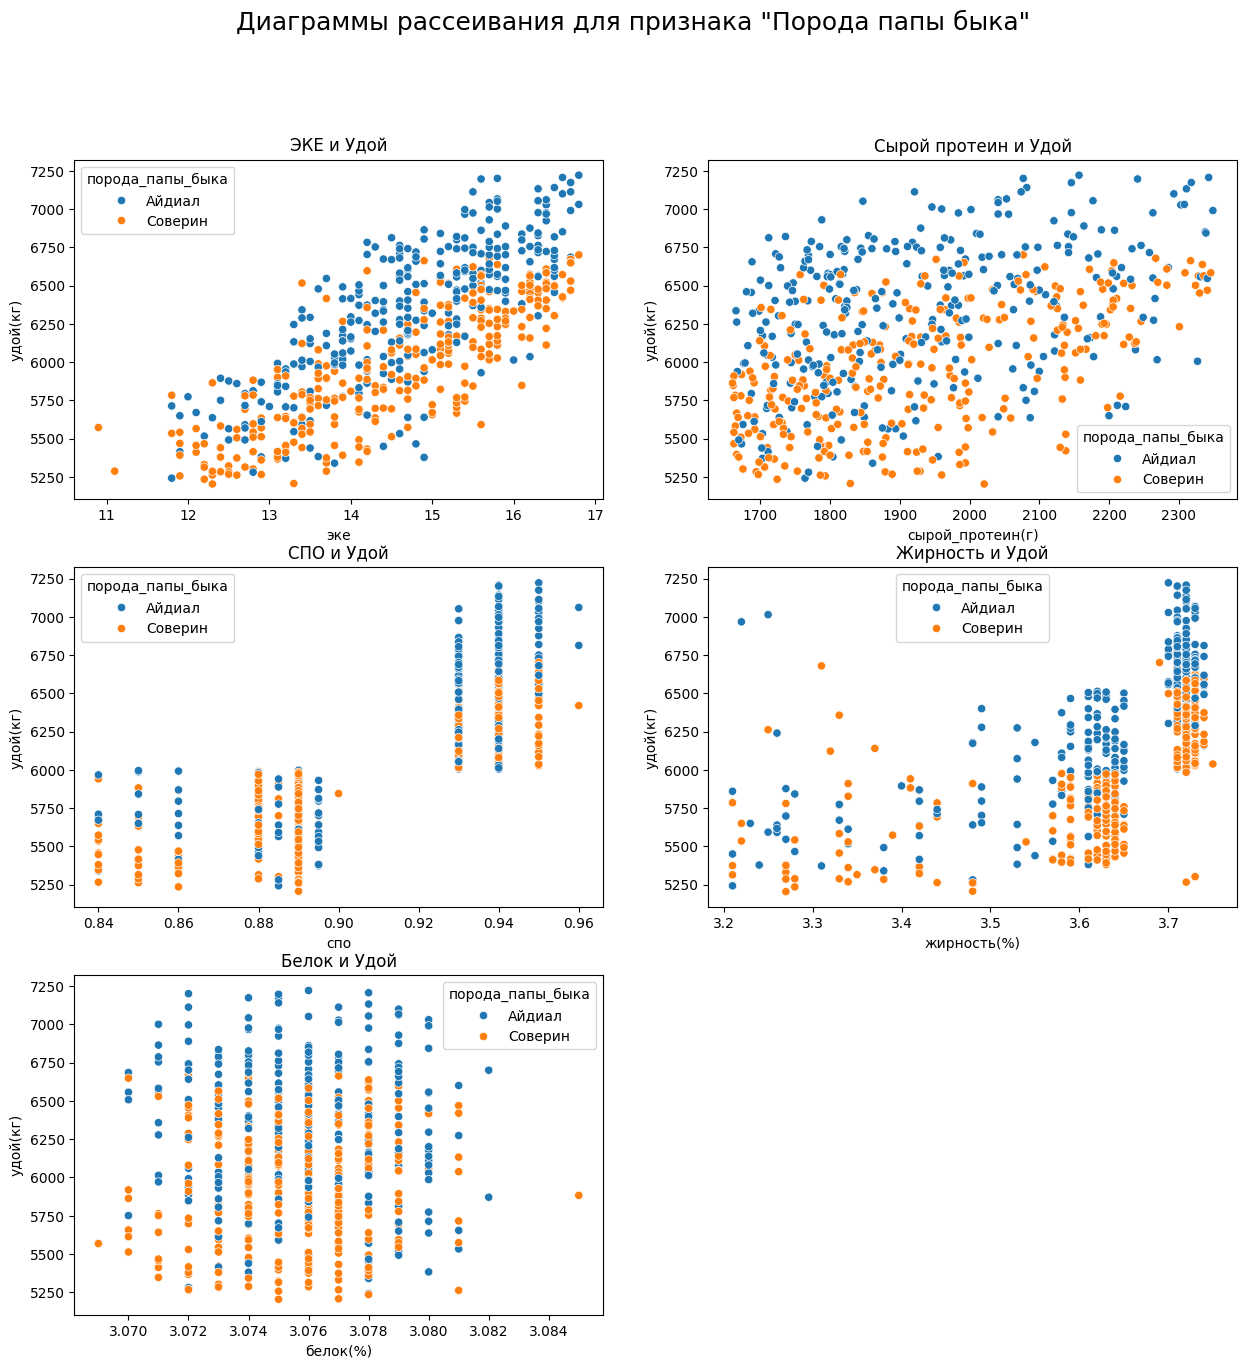

In [796]:
#построим диаграмму рассеивания для признака "Порода папы быка"
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
fig.suptitle('Диаграммы рассеивания для признака "Порода папы быка" ', fontsize=18)

sns.scatterplot(data=ferma_main, x='эке', y='удой(кг)', hue='порода_папы_быка', ax=axes[0,0])
axes[0,0].set_title('ЭКЕ и Удой')

sns.scatterplot(data=ferma_main, x='сырой_протеин(г)', y='удой(кг)', hue='порода_папы_быка', ax=axes[0,1])
axes[0,1].set_title('Сырой протеин и Удой')

sns.scatterplot(data=ferma_main, x='спо', y='удой(кг)', hue='порода_папы_быка', ax=axes[1,0])
axes[1,0].set_title('СПО и Удой')

sns.scatterplot(data=ferma_main, x='жирность(%)', y='удой(кг)', hue='порода_папы_быка', ax=axes[1,1])
axes[1,1].set_title('Жирность и Удой')

sns.scatterplot(data=ferma_main, x='белок(%)', y='удой(кг)', hue='порода_папы_быка', ax=axes[2,0])
axes[2,0].set_title('Белок и Удой')

axes[2,1].remove()

plt.show()

На данных графиках сразу видно, что намного больше Удоя в год приносят коровы, у который папа бык породы Айдиал. Линейная связь также прослеживается у Удоя с ЭКЕ и небольная связь с Сырым протеином.

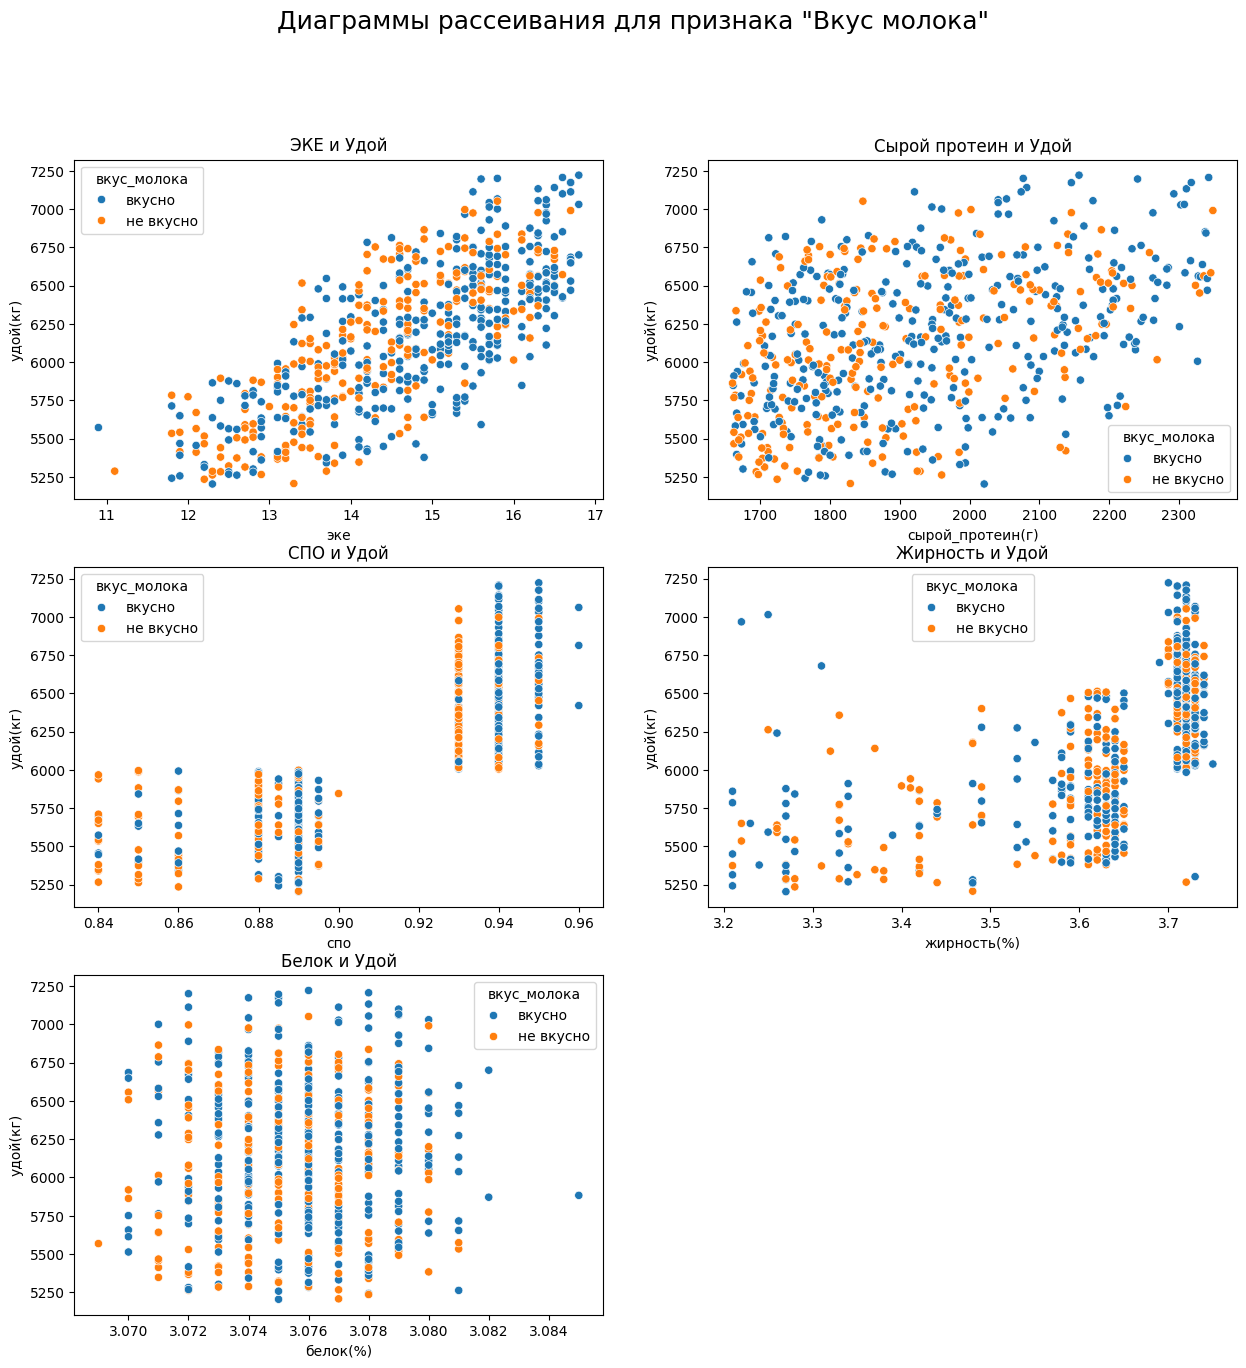

In [797]:
#построим диаграмму рассеивания для признака "Вкус молока"
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
fig.suptitle('Диаграммы рассеивания для признака "Вкус молока" ', fontsize=18)

sns.scatterplot(data=ferma_main, x='эке', y='удой(кг)', hue='вкус_молока', ax=axes[0,0])
axes[0,0].set_title('ЭКЕ и Удой')

sns.scatterplot(data=ferma_main, x='сырой_протеин(г)', y='удой(кг)', hue='вкус_молока', ax=axes[0,1])
axes[0,1].set_title('Сырой протеин и Удой')

sns.scatterplot(data=ferma_main, x='спо', y='удой(кг)', hue='вкус_молока', ax=axes[1,0])
axes[1,0].set_title('СПО и Удой')

sns.scatterplot(data=ferma_main, x='жирность(%)', y='удой(кг)', hue='вкус_молока', ax=axes[1,1])
axes[1,1].set_title('Жирность и Удой')

sns.scatterplot(data=ferma_main, x='белок(%)', y='удой(кг)', hue='вкус_молока', ax=axes[2,0])
axes[2,0].set_title('Белок и Удой')

axes[2,1].remove()

plt.show()

Также, как и выше, линейная связь прослеживается между ЭКЕ и Удоем, и слабая с Сырым протеином, в остальных же случаях связь скорее нелинейна.

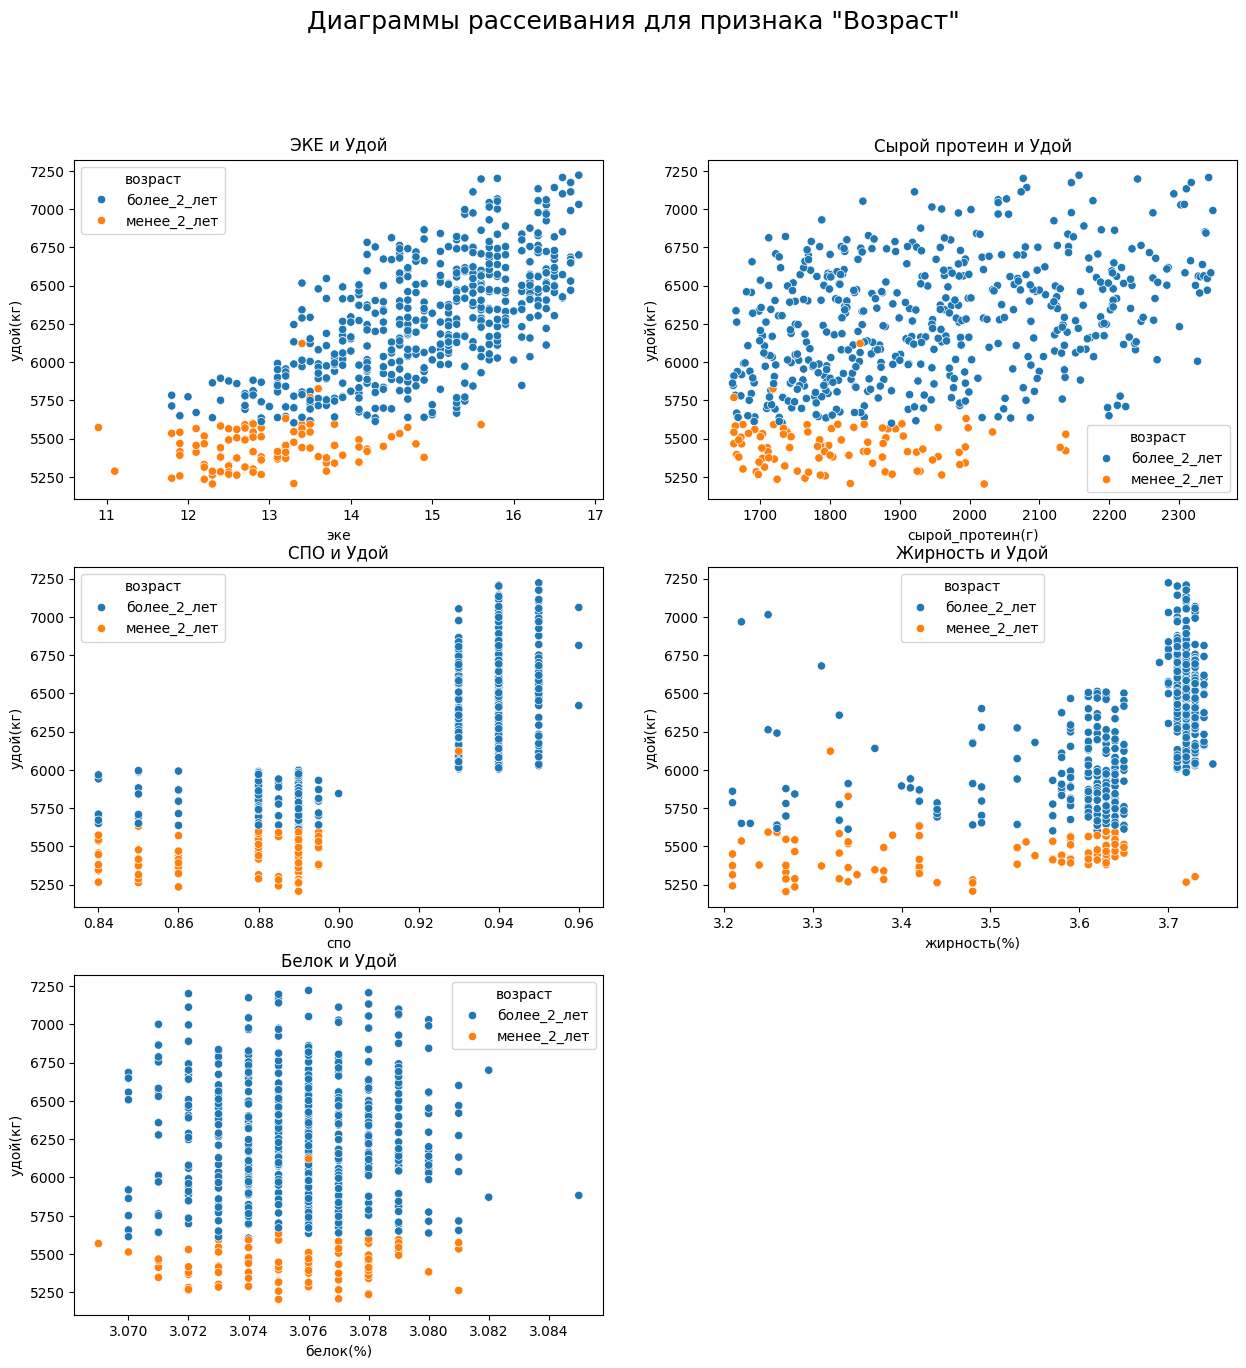

In [798]:
#построим диаграмму рассеивания для признака "Возраст"
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
fig.suptitle('Диаграммы рассеивания для признака "Возраст" ', fontsize=18)

sns.scatterplot(data=ferma_main, x='эке', y='удой(кг)', hue='возраст', ax=axes[0,0])
axes[0,0].set_title('ЭКЕ и Удой')

sns.scatterplot(data=ferma_main, x='сырой_протеин(г)', y='удой(кг)', hue='возраст', ax=axes[0,1])
axes[0,1].set_title('Сырой протеин и Удой')

sns.scatterplot(data=ferma_main, x='спо', y='удой(кг)', hue='возраст', ax=axes[1,0])
axes[1,0].set_title('СПО и Удой')

sns.scatterplot(data=ferma_main, x='жирность(%)', y='удой(кг)', hue='возраст', ax=axes[1,1])
axes[1,1].set_title('Жирность и Удой')

sns.scatterplot(data=ferma_main, x='белок(%)', y='удой(кг)', hue='возраст', ax=axes[2,0])
axes[2,0].set_title('Белок и Удой')

axes[2,1].remove()

plt.show()

Сразу можно отметить, что намного больше Удоя в год дают коровы, которые старше 2х лет. Коровы, которые младже 2х лет в среднем не дают более 5500-5600 кг молока в год. Линейная связь сохраняется по прежнему между Удоем и ЭКЕ и слабая линейная связь с Сырым протеином

Можно сделать небольшое обобщение, что линейная связь наблюдается между целевым признаком Удой и входными признаками ЭКЕ и Сырой протеин (г). Также, если присмотреться между ЭКЕ и Удоем, то можно заметить небольшую квадратичную зависимость. Нелинейная связь наблюдается между целевым признаком Удой и входными признаками СПО, Жирность (%) и Белок (%). Также, большие значения коэффициета корреляции наблюдается между целевым признаком Удой и входными признаками такими, как ЭКЕ, СПО и Возраст. Умеренная корреляция наблюдается между целевым признаком Удой и входными признаками такими, как Сырой протеин(г), Порода папы быка и Жирность (%). Слабая же корреляция наблюдается между целевым признаком Удой и входными признаками такими, как Порода, Тип пастбища, Белок (%) и Вкус молока.

Как правило, о мультиколлинеарности говорят при значении коэффициента корреляции от 0.9 до 0.95 по модулю. Поэтому, в наших данных мультиколлинеарность между входными признаками не наблюдается. Самые большие показатели коэффициента корреляции у "ЭКЕ" и "Сырого протеина", но даже их значения не так близки к 0.9, чтобы была возможна мультиколлинеарность, т.е. между входными признаками нет сильной линейной взаимосвязи.

## Обучение модели линейной регрессии

**Задача регрессии**

1) Построим первую модель. Часть признаков можно отсеять логически, потому что эти признаки не влияют на 'Удой' или они являются его вторичной характеристикой. Поэтому мы исключаем признаки Жирность(%), Белок(%) и Вкус молока, т.к. с Удоем у них нет логической связи. В качестве целевого признака выберем "Удой(кг)". В качестве входных признаков выберем: "ЭКЕ", "Сырой протеин", "СПО", "Порода", "Тип пастбища", Порода папы быка", "Возраст".

In [799]:
# создание константы RANDOM_STATE
RANDOM_STATE = 42

# сохранение выборок и деление данных на тренировочную и тестовую выборки:

X = ferma_main.drop(['удой(кг)','жирность(%)','белок(%)','вкус_молока'], axis=1)
y = ferma_main['удой(кг)'] 
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

Закодируем категориальные признаки с помощью метода OneHotEncoder

In [800]:
# выберем класс OneHotEncoder() для кодирования 
encoder  = OneHotEncoder(drop='first', sparse_output=False)

# список всех категориальных признаков из тренировочной выборки
cat_col_names = ['порода', 'тип_пастбища','порода_папы_быка', 'возраст']

# обучим и преобразуем категориальные признаки из тренировочной выборки одной командой.
# преобразуем категориальные признаки из тестовой выборки 
X_train_ohe = encoder.fit_transform(X_train[cat_col_names]) 
X_test_ohe = encoder.transform(X_test[cat_col_names])

# сохраним в переменной encoder_col_names названия новых столбцов 
encoder_col_names = encoder.get_feature_names_out()

# выведем пять первых строк на экран
print(X_train_ohe[:5])
print(X_test_ohe[:5])

[[1. 1. 1. 0.]
 [1. 1. 1. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 1. 1. 0.]]
[[0. 0. 1. 0.]
 [1. 1. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]]


Масштабируем количественные признаки с помощью StandardScaler.

In [801]:
# подготовка признаков для масштабирования
# список всех количественных признаков из тренировочной выборки
num_col_names = ['эке', 'сырой_протеин(г)', 'спо']
# определим метод масштабирования
scaler = StandardScaler()
# обучим и трансформируем количественные признаки из тренировочной выборки 
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
# выполним преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_col_names])

Обучим модель линейной регрессии на подготовленных данных

In [802]:
# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажем из переменной encoder_col_names

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# выведем пять первых строк из тренировочного датафрейма
display(X_train[:5])

порода_РефлешнСоверинг  тип_пастбища_холмистое  порода_папы_быка_Соверин  \
0                     1.0                     1.0                       1.0   
1                     1.0                     1.0                       1.0   
2                     1.0                     0.0                       0.0   
3                     0.0                     0.0                       0.0   
4                     1.0                     1.0                       1.0   

   возраст_менее_2_лет       эке  сырой_протеин(г)       спо  
0                  0.0 -0.294039         -1.250760  0.523871  
1                  1.0 -0.524850         -0.711993 -1.690689  
2                  0.0  0.706140         -1.190897  0.840236  
3                  0.0  1.321635         -0.891582  0.840236  
4                  0.0  1.552446          1.056687  0.840236

Создадим модель линейной регрессии

In [803]:
# инициализация модели
model_lr  = LinearRegression()

# обучение модели на тренировочных данных
model_lr.fit(X_train, y_train) 

# вывод рассчитанных коэффициентов выведите значения коэффициентов 𝑤1-𝑤7 и 𝑤0
print(model_lr.coef_, model_lr.intercept_) 

[  -1.43641609   47.67022535 -241.46164091 -249.31348838  167.49109124
   38.15139665  163.88263499] 6271.048285395643


In [804]:
# предсказанные значения для X_test
predictions = model_lr.predict(X_test) 

# вывод предсказанных значений и настоящих значений
print(predictions[:5])
print(y_test.reset_index(drop=True)[:5])

[5846.79657255 6227.99299705 6860.12159346 6489.17403423 6538.30328175]
0    5998
1    6342
2    7174
3    6398
4    6420
Name: удой(кг), dtype: int64


Далее, оценим качество модели на тестовой выборке, для этого рассчитаем коэффициент детерминации R²

In [805]:
# рассчитаем значения R2 для линейной регрессии
r2 = r2_score(y_test, predictions)  

# выведием полученное значение R2
print("R2 LinearRegression =", r2)

R2 LinearRegression = 0.7240384740005966


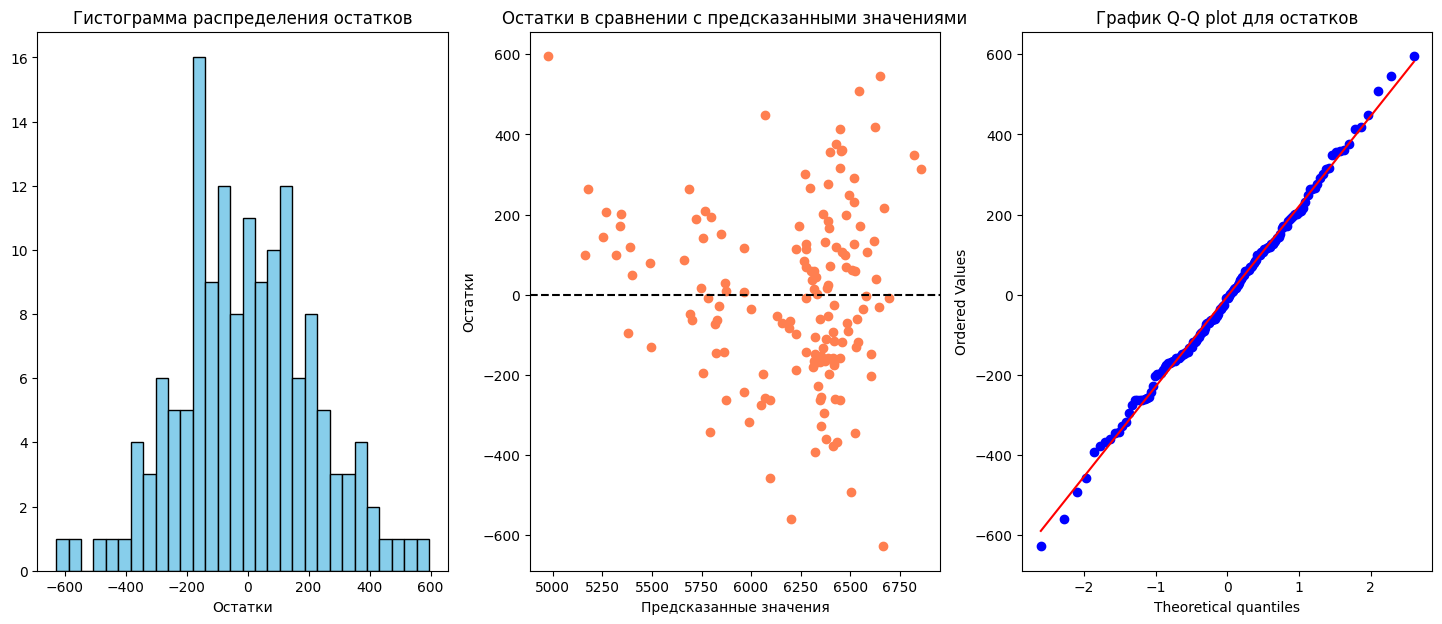

In [806]:
#import pylab 
#import scipy.stats as stats
#from scipy import stats

residuals = y_test - predictions
# Построим графики остатков
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,7))

# Гистограмма остатков
axes[0].hist(residuals, bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

# График остатков относительно среднего
axes[1].scatter(predictions, residuals, color='coral')
axes[1].axhline(y=0, color='black', linestyle='--')
axes[1].set_title('Остатки в сравнении с предсказанными значениями')
axes[1].set_xlabel('Предсказанные значения')
axes[1].set_ylabel('Остатки')

# График Q-Q plot для нормальности распределения
stats.probplot(residuals, dist="norm", plot=plt)
axes[2].set_title('График Q-Q plot для остатков')

plt.show()

Коэффициент детерминации R² измеряется в диапазоне от −∞ до 1. Единица — это его максимальное значение, которое говорит о том, что модель не ошибается. В нашем случае коэффициент детерминации R² = 0.7240. Это означает, что модель работает хорошо (имеет высокую значимость) и предсказания у модели можно считать достаточно точными. На гистограмме распределения остатки имеют асимметричное нормальное распределение с небольшим смещением влево относительно 0. Это означает, что модель дает немного большие предсказания, то есть её прогнозы чуть-чуть выше истинных значений. Также, разница между истинными значениями и предсказанными принимает как положительные, так и отрицательные значения.

Далее, чтобы проверить, выполняется ли предположение о гомоскедастичности (остатки имеют постоянную дисперсию на каждом уровне x), мы создали график остатков, который представляет собой диаграмму рассеяния, показывающую остатки в сравнении с прогнозируемыми значениями модели. На графике остатки разбросаны вокруг нуля, и можно заметить, что модель чаще или сильнее ошибается, предсказывая большой удой. Остатки становятся немного более разбросанными по мере того, как значения становятся больше.
Это говорит о небольшой неточности у модели. Модель можно исправить добавив в модель дополнительные признаки, либо же, трансформировать данные, чтобы изменить взаимосвязь входных признаков с целевым.

Также, по графику QQ мы можем определить, что остатки следуют модели нормального распределения, т.к. точки на графике примерно образуют прямую диагональную линию.

2) Построим **вторую модель линейной регрессии** с учётом преобразования признаков, нелинейно связанных с целевым признаком

Признаки СПО и Удой связаны нелинейно. На их диаграмме рассеивания наблюдаются два сгруппированых кластера, причём есть значение, примерно равное 0.9, которое можно считать границей между кластерами. Чтобы устранить нелинейность, преобразуйте СПО в категориальный бинарный признак, использовав эту границу. Поделим признак СПО на 2 категории: 'менее_0.9' и 'более_0.9'.

In [807]:
ferma_main['спо_обработанное'] = ferma_main['спо'].apply(lambda x: 'менее_0.9' if x<0.9 else 'более_0.9')
# выведем 5 случайных строк
print(ferma_main['спо_обработанное'].sample(5))

168    менее_0.9
58     более_0.9
92     менее_0.9
404    более_0.9
177    более_0.9
Name: спо_обработанное, dtype: object


По ЭКЕ и Удою у нас что-то среднее между линейной и квадратичной зависимостью. Если присмотреться, можно увидеть график квадратичной функции. Устраним квадратичную зависимость, чтобы модель могла корректно учесть признак. Скомпенсировать ЭКЕ можно возведя её в квадрат.

In [808]:
ferma_main['эке_обработанная'] = ferma_main['эке'].apply(lambda x: x**2)
# выведем 5 случайных строк
print(ferma_main['эке_обработанная'].sample(5))

524    240.25
330    184.96
149    198.81
615    222.01
388    262.44
Name: эке_обработанная, dtype: float64


In [809]:
ferma_main.head()

id  удой(кг)   эке  сырой_протеин(г)    спо           порода тип_пастбища  \
0   1      5863  14.2              1743  0.890   Вис Бик Айдиал    равнинное   
1   2      5529  12.8              2138  0.890   Вис Бик Айдиал    равнинное   
2   3      5810  14.0              1854  0.885  РефлешнСоверинг    холмистое   
3   4      5895  12.4              2012  0.885  РефлешнСоверинг    холмистое   
4   5      5302  12.8              1675  0.885   Вис Бик Айдиал    равнинное   

  порода_папы_быка  жирность(%)  белок(%) вкус_молока      возраст  \
0           Айдиал         3.58     3.076      вкусно  более_2_лет   
1          Соверин         3.54     3.079      вкусно  менее_2_лет   
2          Соверин         3.59     3.074   не вкусно  более_2_лет   
3           Айдиал         3.40     3.075   не вкусно  более_2_лет   
4          Соверин         3.73     3.073      вкусно  менее_2_лет   

  спо_обработанное  эке_обработанная  
0        менее_0.9            201.64  
1        менее_0.9            163.84  
2        менее_0.9            196.00  
3        менее_0.9            153.76  
4        менее_0.9            163.84

В качестве целевого признака также остается "Удой(кг)". В качестве входных признаков убираем 'эке' и 'спо' и оставляем 'эке_обработанная' и 'спо_обработанное'. Остальные признаки оставляем те же.

In [810]:
# создание константы RANDOM_STATE
RANDOM_STATE = 42

# сохранение выборок и деление данных на тренировочную и тестовую выборки:

X = ferma_main.drop(['удой(кг)','жирность(%)','белок(%)','вкус_молока', 'эке','спо'], axis=1)
y = ferma_main['удой(кг)'] 

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

# выберем класс OneHotEncoder() для кодирования 
encoder = OneHotEncoder(drop='first', sparse_output=False)

# список всех категориальных признаков из тренировочной выборки
cat_col_names = ['порода', 'тип_пастбища','порода_папы_быка', 'возраст', 'спо_обработанное']

# обучим и преобразуем категориальные признаки из тренировочной выборки одной командой.
# преобразуем категориальные признаки из тестовой выборки 
X_train_ohe = encoder.fit_transform(X_train[cat_col_names]) 
X_test_ohe = encoder.transform(X_test[cat_col_names])

# сохраним в переменной encoder_col_names названия новых столбцов 
encoder_col_names = encoder.get_feature_names_out()

## подготовка признаков для масштабирования
# список всех количественных признаков из тренировочной выборки
num_col_names = ['эке_обработанная', 'сырой_протеин(г)']
# определим метод масштабирования
scaler = StandardScaler()
# обучим и трансформируем количественные признаки из тренировочной выборки 
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
# выполним преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_col_names])

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажем из переменной encoder_col_names

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# инициализация модели
model_lr_2  = LinearRegression()

# обучение модели на тренировочных данных
model_lr_2.fit(X_train, y_train) 

# предсказанные значения для X_test
predictions_2 = model_lr_2.predict(X_test) 

# рассчитаем значения R2 для линейной регрессии
r2_2 = r2_score(y_test, predictions_2)  

# выведием полученное значение R2
print("R2 LinearRegression =", r2_2)

R2 LinearRegression = 0.7408047832174617


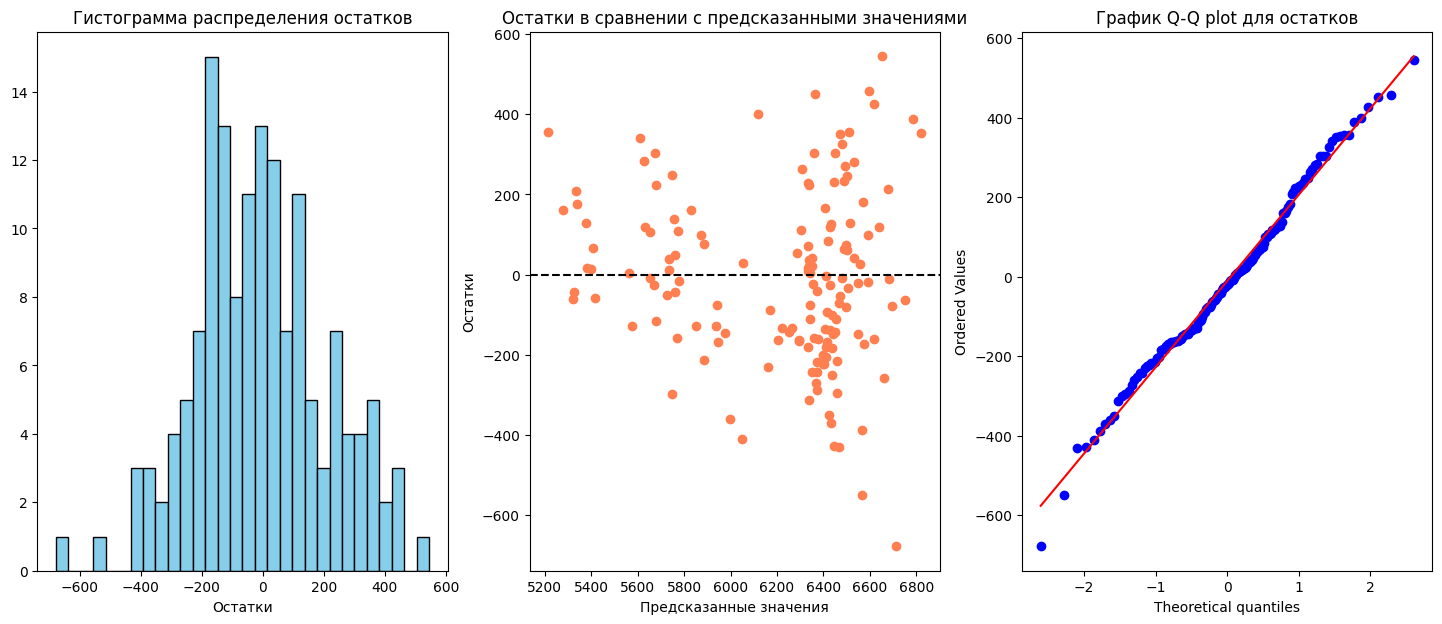

In [811]:
residuals_2 = y_test - predictions_2
# Построим графики остатков
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,7))

# Гистограмма остатков
axes[0].hist(residuals_2, bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

# График остатков относительно среднего
axes[1].scatter(predictions_2, residuals_2, color='coral')
axes[1].axhline(y=0, color='black', linestyle='--')
axes[1].set_title('Остатки в сравнении с предсказанными значениями')
axes[1].set_xlabel('Предсказанные значения')
axes[1].set_ylabel('Остатки')

# График Q-Q plot для нормальности распределения
stats.probplot(residuals_2, dist="norm", plot=plt)
axes[2].set_title('График Q-Q plot для остатков')

plt.show()

Во 2 модели коэффициент детерминации R² чуть-чуть вырос, но по прежнему остался равен 0.7408. Это означает, что 2 модель показывает себя лучше чем 1 и предсказания у модели можно считать достаточно точными.

На гистограмме распределения остатки имеют асимметричное нормальное распределение относительно 0. Это означаеи, что модель дает чуть большие предсказания, и её прогнозы немного больше истинных значений. Данная модель работает чуть более качественно чем первая.

На 2 графике ситуация никак не изменилась, остатки остались разбросанными и дисперсия увеличивается по мере увеличения значений.

На графике QQ ситуация так же осталась прижней. Остатки следуют модели нормального распределения, т.к. точки на графике примерно образуют прямую диагональную линию.

Таким образом, можно сделать вывод, что вторая модель оказалась чуть более точной чем первая. А значит, исключение нелинейности между признаками повлияло на модель в лучшую сторону.

3) Построим **третью модель** добавив новый признак 'Имя Папы' из файла 'ferma_dad'

Далее, соединим 2 датафрейма ferma_main и ferma_dad в один для более наглядной информации

In [812]:
#объединяем датафреймы в один датафрейм
ferma_main_total = ferma_main.merge(ferma_dad, on='id', how='left')
display(ferma_main_total.head(5))

id  удой(кг)   эке  сырой_протеин(г)    спо           порода тип_пастбища  \
0   1      5863  14.2              1743  0.890   Вис Бик Айдиал    равнинное   
1   2      5529  12.8              2138  0.890   Вис Бик Айдиал    равнинное   
2   3      5810  14.0              1854  0.885  РефлешнСоверинг    холмистое   
3   4      5895  12.4              2012  0.885  РефлешнСоверинг    холмистое   
4   5      5302  12.8              1675  0.885   Вис Бик Айдиал    равнинное   

  порода_папы_быка  жирность(%)  белок(%) вкус_молока      возраст  \
0           Айдиал         3.58     3.076      вкусно  более_2_лет   
1          Соверин         3.54     3.079      вкусно  менее_2_лет   
2          Соверин         3.59     3.074   не вкусно  более_2_лет   
3           Айдиал         3.40     3.075   не вкусно  более_2_лет   
4          Соверин         3.73     3.073      вкусно  менее_2_лет   

  спо_обработанное  эке_обработанная  имя_папы  
0        менее_0.9            201.64    Буйный  
1        менее_0.9            163.84  Соловчик  
2        менее_0.9            196.00     Барин  
3        менее_0.9            153.76    Буйный  
4        менее_0.9            163.84     Барин

В качестве целевого признака выберем "Удой(кг)". В качестве входных признаков выберем: "эке_обработанная", "Сырой протеин", "спо_обработанное", "Порода", "Тип пастбища", Порода папы быка", "Возраст" и "Имя папы"

In [813]:
# создание константы RANDOM_STATE
RANDOM_STATE = 42

# сохранение выборок и деление данных на тренировочную и тестовую выборки:

X = ferma_main_total.drop(['удой(кг)','жирность(%)','белок(%)','вкус_молока', 'эке','спо'], axis=1)
y = ferma_main_total['удой(кг)'] 

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

# выберем класс OneHotEncoder() для кодирования 
encoder = OneHotEncoder(drop='first', sparse_output=False)

# список всех категориальных признаков из тренировочной выборки
cat_col_names = ['порода', 'тип_пастбища','порода_папы_быка', 'возраст', 'спо_обработанное', 'имя_папы']

# обучим и преобразуем категориальные признаки из тренировочной выборки одной командой.
# преобразуем категориальные признаки из тестовой выборки 
X_train_ohe = encoder.fit_transform(X_train[cat_col_names]) 
X_test_ohe = encoder.transform(X_test[cat_col_names])

# сохраним в переменной encoder_col_names названия новых столбцов 
encoder_col_names = encoder.get_feature_names_out()

## подготовка признаков для масштабирования
# список всех количественных признаков из тренировочной выборки
num_col_names = ['эке_обработанная', 'сырой_протеин(г)']
# определим метод масштабирования
scaler = StandardScaler()
# обучим и трансформируем количественные признаки из тренировочной выборки 
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
# выполним преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_col_names])

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажем из переменной encoder_col_names

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# инициализация модели
model_lr_3  = LinearRegression()

# обучение модели на тренировочных данных
model_lr_3.fit(X_train, y_train) 

# предсказанные значения для X_test
predictions_3 = model_lr_3.predict(X_test) 

# рассчитаем значения R2 для линейной регрессии
r2_3 = r2_score(y_test, predictions_3)  

# выведием полученное значение R2
print("R2 LinearRegression =", r2_3)

R2 LinearRegression = 0.7560090061238003


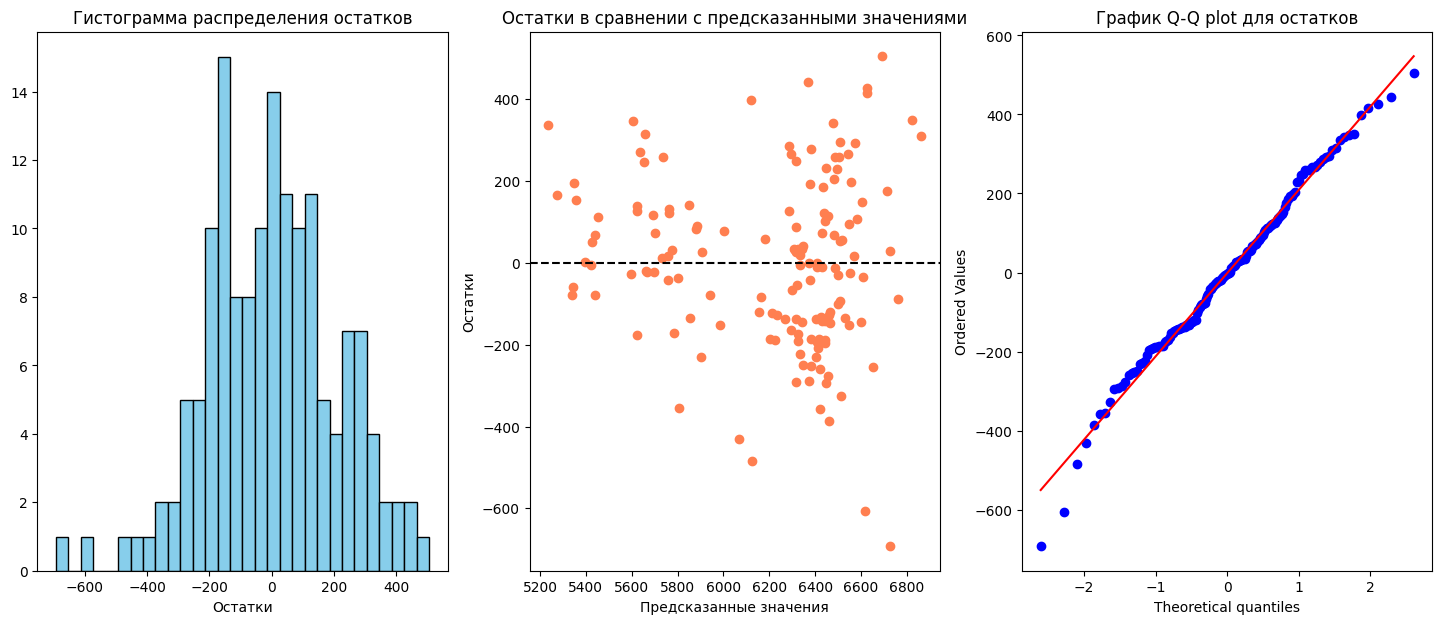

In [814]:
residuals_3 = y_test - predictions_3
# Построим графики остатков
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,7))

# Гистограмма остатков
axes[0].hist(residuals_3, bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

# График остатков относительно среднего
axes[1].scatter(predictions_3, residuals_3, color='coral')
axes[1].axhline(y=0, color='black', linestyle='--')
axes[1].set_title('Остатки в сравнении с предсказанными значениями')
axes[1].set_xlabel('Предсказанные значения')
axes[1].set_ylabel('Остатки')

# График Q-Q plot для нормальности распределения
stats.probplot(residuals_3, dist="norm", plot=plt)
axes[2].set_title('График Q-Q plot для остатков')

plt.show()

В 3 модели коэффициент детерминации R² вырос по сравнению с предыдущей моделью и стал равняться 0.7560. Это означает, что модель дает более точные предсказания в сравнении с 1 и 2 моделями. На гистограмме распределения остатки имеют все еще асимметричное нормальное распределение относительно 0. При этом это смещение оказалось все же меньше, чем у предыдущей модели, и она выглядит немного стабильнее второй. На 2 графике ситуация никак не изменилась, дисперсия у остатков не постояна и увеличивается по мере увеличения значений. На графике QQ ситуация так же осталась прижней. Остатки следуют модели нормального распределения, т.к. точки на графике примерно образуют прямую диагональную линию.

Сравним 3 модели

**Коэффициент детерминации R²** у трех моделей:

- 1 модель: R² = 0.7240;
- 2 модель: R² = 0.7408;
- 3 модель: R² = 0.7560.

**Анализ остатков:**

- 1 модель:
Остатки имеют асимметричное нормальное распределение с небольшим смещением влево относительно 0. Это означает, что модель дает немного большие предсказания, то есть её прогнозы чуть-чуть выше истинных значений.
При анализе дисперсии ошибок можно заметить, что модель чаще или сильнее ошибается, предсказывая большой удой. Это говорит нам о неточности модели. По графику QQ остатки следуют модели нормального распределения.

- 2 модель:
Остатки имеют асимметричное нормальное распределение относительно 0. Это означает, что модель дает чуть большие предсказания, и её прогнозы немного больше истинных значений. Данная модель работает чуть более качественно чем первая. При анализе дисперсии ошибок ситуация никак не изменилась, дисперсия увеличивается по мере увеличения значений. На графике QQ ситуация так же осталась прижней. Остатки следуют модели нормального распределения.

- 3 модель:
Остатки имеют асимметричное нормальное распределение относительно 0. Распределение стало более стабильное по сравнению с предыдущей моделью. При анализе дисперсии ошибок ситуация не изменилась, дисперсия у остатков не постояна и увеличивается по мере увеличения значений. На графике QQ ситуация так же осталась прижней. Остатки следуют модели нормального распределения

Таким образом, можно сделать вывод, что исключение нелинейности между признаками, а также добавление новых признаков хорошо влияет на нашу модель, и делает ее более качественной, т.к. третья модель оказалась более точной.

Оценим качество каждой модели по трём метрикам: MSE, MAE, RMSE.

In [815]:
#MSE для 3х моделей
mse_1 = mean_squared_error(y_test, predictions) 
mse_2 = mean_squared_error(y_test, predictions_2) 
mse_3 = mean_squared_error(y_test, predictions_3) 

#MAE для 3х моделей
mae_1 = mean_absolute_error(y_test, predictions)
mae_2 = mean_absolute_error(y_test, predictions_2)
mae_3 = mean_absolute_error(y_test, predictions_3)

#RMSE для 3х моделей
rmse_1 = mean_squared_error(y_test, predictions, squared=False)
rmse_2 = mean_squared_error(y_test, predictions_2, squared=False)
rmse_3 = mean_squared_error(y_test, predictions_3, squared=False)

print('MSE для первой модели', mse_1)
print('MSE для второй модели', mse_2)
print('MSE для третьей модели', mse_3)
print()
print('MAE для первой модели', mae_1)
print('MAE для второй модели', mae_2)
print('MAE для третьей модели', mae_3)
print()
print('RMSE для первой модели', rmse_1)
print('RMSE для второй модели', rmse_2)
print('RMSE для третьей модели', rmse_3)

MSE для первой модели 49354.96737750587
MSE для второй модели 46356.35863506348
MSE для третьей модели 43637.12477510763

MAE для первой модели 177.96892145467305
MAE для второй модели 170.78994180351958
MAE для третьей модели 164.81559599122767

RMSE для первой модели 222.1597789373807
RMSE для второй модели 215.30526847957873
RMSE для третьей модели 208.89500897605868


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Как видно из выведенных значений 3 модель имеет наименьшие показатели из всех моделей. Поэтому она является самой точной моделью из трех.

Найдем доверительный интервал прогноза лучшей модели (3 модели).

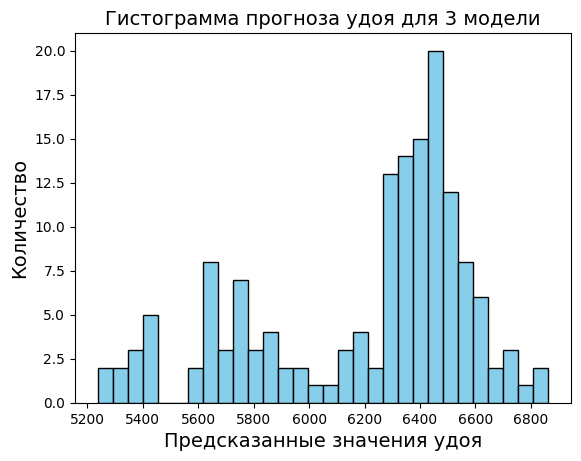

In [816]:
plt.hist(predictions_3, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Предсказанные значения удоя', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.title('Гистограмма прогноза удоя для 3 модели', fontsize=14)
plt.show()

In [817]:
print('95% доверительный интервал =', st.norm.interval(confidence=0.95, loc=np.mean(predictions_3), scale=st.sem(predictions_3)))

95% доверительный интервал = (6140.74490721304, 6265.943432791182)


С помощью 3 модели спрогнозируем удой коров, которых фермер хочет купить.

In [818]:
# найдем средние значения признаков, увеличим их на 5% и добавим в датафрейм cow_buy
eke = ferma_main['эке'].mean()
spo = ferma_main['спо'].mean()
sp = ferma_main['сырой_протеин(г)'].mean()
cow_buy['эке'] = eke * 1.05
cow_buy['сырой_протеин(г)'] = sp * 1.05
cow_buy['спо'] = spo * 1.05
display(cow_buy.head())

порода тип_пастбища порода_папы_быка  имя_папы  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный   
2  РефлешнСоверинг    равнинное          Соверин     Барин   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный   

   текущая_жирность(%)  текущий_белок(%)      возраст        эке  \
0                 3.58             3.076  более_2_лет  15.354716   
1                 3.54             3.081  менее_2_лет  15.354716   
2                 3.59             3.074  более_2_лет  15.354716   
3                 3.40             3.061  более_2_лет  15.354716   
4                 3.64             3.074  более_2_лет  15.354716   

   сырой_протеин(г)       спо  
0       2026.475459  0.960881  
1       2026.475459  0.960881  
2       2026.475459  0.960881  
3       2026.475459  0.960881  
4       2026.475459  0.960881

In [819]:
cow_buy_copy = cow_buy.copy()
#создадим копию, чтобы потом добавить значение удоя в оригинальную таблицу

Как делали выше, преобразуем признаки ЭКЕ и СПО.

In [820]:
cow_buy_copy['спо_обработанное'] = cow_buy['спо'].apply(lambda x: 'менее_0.9' if x<0.9 else 'более_0.9')
# выведем 5 случайных строк
print(cow_buy_copy['спо_обработанное'].sample(5))

cow_buy_copy['эке_обработанная'] = cow_buy['эке'].apply(lambda x: x**2)
# выведем 5 случайных строк
print(cow_buy_copy['эке_обработанная'].sample(5))

# уберем признаки которые не будут участвовать
cow_buy_copy = cow_buy_copy.drop(columns=['текущая_жирность(%)','текущий_белок(%)'])

display(cow_buy_copy.head())

5     более_0.9
16    более_0.9
17    более_0.9
6     более_0.9
1     более_0.9
Name: спо_обработанное, dtype: object
17    235.767309
7     235.767309
8     235.767309
10    235.767309
15    235.767309
Name: эке_обработанная, dtype: float64


порода тип_пастбища порода_папы_быка  имя_папы      возраст  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес  более_2_лет   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный  менее_2_лет   
2  РефлешнСоверинг    равнинное          Соверин     Барин  более_2_лет   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный  более_2_лет   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный  более_2_лет   

         эке  сырой_протеин(г)       спо спо_обработанное  эке_обработанная  
0  15.354716       2026.475459  0.960881        более_0.9        235.767309  
1  15.354716       2026.475459  0.960881        более_0.9        235.767309  
2  15.354716       2026.475459  0.960881        более_0.9        235.767309  
3  15.354716       2026.475459  0.960881        более_0.9        235.767309  
4  15.354716       2026.475459  0.960881        более_0.9        235.767309

In [821]:
cow_buy_copy = cow_buy_copy.drop(columns=['эке','спо'])
display(cow_buy_copy.head())

порода тип_пастбища порода_папы_быка  имя_папы      возраст  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес  более_2_лет   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный  менее_2_лет   
2  РефлешнСоверинг    равнинное          Соверин     Барин  более_2_лет   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный  более_2_лет   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный  более_2_лет   

   сырой_протеин(г) спо_обработанное  эке_обработанная  
0       2026.475459        более_0.9        235.767309  
1       2026.475459        более_0.9        235.767309  
2       2026.475459        более_0.9        235.767309  
3       2026.475459        более_0.9        235.767309  
4       2026.475459        более_0.9        235.767309

In [822]:
# создание константы RANDOM_STATE
RANDOM_STATE = 42

# сохранение выборок и деление данных на тренировочную и тестовую выборки:

X = ferma_main_total.drop(['удой(кг)','жирность(%)','белок(%)','вкус_молока', 'эке','спо'], axis=1)
y = ferma_main_total['удой(кг)'] 

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

# список всех признаков
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы', 'возраст', 'спо_обработанное']
num_col_names = ['эке_обработанная', 'сырой_протеин(г)']

# Обучение модели - сохраняем порядок признаков
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])

# Собираем полные данные для обучения
X_train_prepared = pd.concat([
    pd.DataFrame(X_train_ohe, columns=encoder_col_names), 
    pd.DataFrame(X_train_scaled, columns=num_col_names)
], axis=1)

# После этого тренируем модель
model_lr_3.fit(X_train_prepared, y_train)

# Преобразуем новые данные с теми же шагами, что и обучающую выборку
cow_buy_ohe = encoder.transform(cow_buy_copy[cat_col_names])
cow_buy_ohe = pd.DataFrame(cow_buy_ohe, columns=encoder_col_names)

cow_buy_scaled = scaler.transform(cow_buy_copy[num_col_names])
cow_buy_scaled = pd.DataFrame(cow_buy_scaled, columns=num_col_names)

# Объединяем все преобразованные данные
cow_buy_2 = pd.concat([cow_buy_ohe, cow_buy_scaled], axis=1)

# Делаем предсказания
cow_buy['удой(кг)'] = model_lr_3.predict(cow_buy_2)

# Выводим результат
display(cow_buy.head(3))

порода тип_пастбища порода_папы_быка  имя_папы  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный   
2  РефлешнСоверинг    равнинное          Соверин     Барин   

   текущая_жирность(%)  текущий_белок(%)      возраст        эке  \
0                 3.58             3.076  более_2_лет  15.354716   
1                 3.54             3.081  менее_2_лет  15.354716   
2                 3.59             3.074  более_2_лет  15.354716   

   сырой_протеин(г)       спо     удой(кг)  
0       2026.475459  0.960881  6647.158182  
1       2026.475459  0.960881  6352.150226  
2       2026.475459  0.960881  6304.235706

In [823]:
print(cow_buy['удой(кг)'].min())
print(cow_buy['удой(кг)'].max())

6125.9087988044
6653.838799861351


В результате предсказанные значения удоя принимают значения в промежутке от 6125 - 6653 кг в год. Узнаем, сколько коров подходит по удою для фермера

In [824]:
cows_count = cow_buy[cow_buy['удой(кг)'] >= 6000]
print(cows_count['удой(кг)'].count())

20


Потенциально подходящих коров по количеству удоя 20 штук.

В итоге, после 5 шага нашей работы можно сделать небольшое обобщение.

Мы построили три модели простой линейной регрессии. Закодировали категориальные признаки с помощью метода OneHotEncoder. Масштабировали количественные признаки с помощью StandardScaler. Обучили модель линейной регрессии на подготовленных данных.

Часть признаков мы отсеяли логически, потому что эти признаки не влияют на 'Удой' или они являются его вторичной характеристикой. В качестве целевого признака для всех 3х моделей мы выбрали "Удой(кг)". В качестве входных признаков для первой модели мы выбрали "ЭКЕ", "Сырой протеин", "СПО", "Порода", "Тип пастбища", "Порода папы быка", "Возраст". Для второй модели мы устранили нелинейность, преобразуя СПО в категориальный бинарный признак, а значение ЭКЕ скомпенсировали возведя в квадрат. В качестве входных признаков убирали 'эке' и 'спо' и оставили 'эке_обработанная' и 'спо_обработанное'. Остальные признаки оставили те же. В третьей модели мы соединили 2 датафрейма ferma_main и ferma_dad в один. В качестве входных признаков выберали "эке_обработанная", "Сырой протеин", "спо_обработанное", "Порода", "Тип пастбища", Порода папы быка", "Возраст" и "Имя папы".

После сравнили качество трёх моделей линейной регрессии, сопоставив их R² и остатки. Третья модель оказалась более предпочтительной т.к. после исключения нелинейности между признаками, а также добавления новых признаков модель стала более качественной.

Далее мы оценили качество каждой модели по трём метрикам: MSE, MAE, RMSE. И увидели, что из выведенных значений, 3 модель имеет наименьшие показатели из всех моделей. Поэтому она является самой точной моделью из трех. После, нашли доверительный интервал прогноза 3 модели и он оказался равен от 6140 до 6265.   

И в завершении, с помощью 3 модели спрогнозировали удой коров, которых фермер хочет купить. Выполнили подготовку данных, аналогичную той, которую делали выше и в результате предсказанные значения удоя принимяли значения в промежутке от 6125 - 6653 кг в год. Потенциально подходящих коров по количеству удоя для фермера 20 штук.

## Обучение модели логистической регрессии

Теперь решим задачу классификации для датафрейма ferma_main_total. Использем в качестве целевого признак 'Вкус молока'. В качестве входных признаков возьмем такие признаки, как 'эке_обработанная', 'сырой протеин(г)', 'спо_обработанное', 'Порода', 'Тип пастбища', 'Порода папы быка', 'Жирность(%)', 'Белок(%)', 'Возраст' и 'Имя папы'.

In [825]:
# создание константы RANDOM_STATE
RANDOM_STATE = 42

# сохранение выборок и деление данных на тренировочную и тестовую выборки:

X = ferma_main_total.drop(['удой(кг)','вкус_молока', 'эке', 'спо'], axis=1)
y = ferma_main_total['вкус_молока'] 

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

y_train = y_train.map({'не вкусно': 0, 'вкусно': 1}).astype(int)
y_test = y_test.map({'не вкусно': 0, 'вкусно': 1}).astype(int)

# выберем класс OneHotEncoder() для кодирования 
encoder = OneHotEncoder(drop='first', sparse_output=False)

# список всех категориальных признаков из тренировочной выборки
cat_col_names = ['спо_обработанное', 'порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы']

# обучим и преобразуем категориальные признаки из тренировочной выборки одной командой.
# преобразуем категориальные признаки из тестовой выборки 
X_train_ohe = encoder.fit_transform(X_train[cat_col_names]) 
X_test_ohe = encoder.transform(X_test[cat_col_names])

# сохраним в переменной encoder_col_names названия новых столбцов 
encoder_col_names = encoder.get_feature_names_out()


## подготовка признаков для масштабирования
# список всех количественных признаков из тренировочной выборки
num_col_names = ['эке_обработанная', 'сырой_протеин(г)', 'жирность(%)', 'белок(%)']
# определим метод масштабирования
scaler = StandardScaler()
# обучим и трансформируем количественные признаки из тренировочной выборки 
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
# выполним преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_col_names])

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажем из переменной encoder_col_names

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

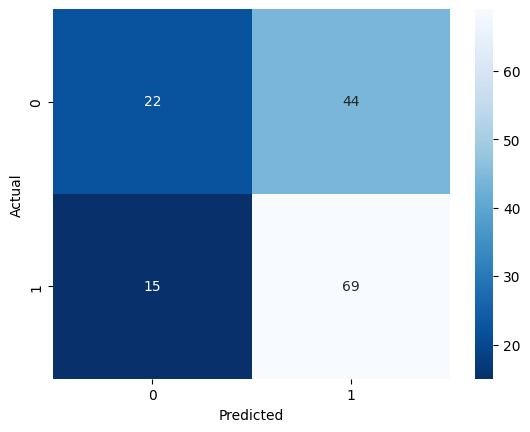

In [826]:
#Обучим модель логистической регрессии на подготовленных данных.
# создаём объект для работы с моделью
clf = LogisticRegression() 

# обучаем модель на данных
clf = clf.fit(X_train, y_train) 

# получаем прогнозные метки классов
y_pred = clf.predict(X_test)

# построим матрицу ошибок и сохраним её в переменную
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Вкусно — это класс 1, не вкусно — класс 0. 
Из матрицы ошибок следует, что:  
в 69 случаях модель правильно отнесла вкусное молоко к категории 'вкусно' (TP: 1-1);  
в 44 случаях модель неправильно отнесла невкусное молоко к категории 'вкусно' (FP: 0-1);  
в 15 случаях модель неправильно отнесла вкусное молоко к категории ' не вкусно' (FN: 1-0);  
в 22 случаях модель правильно отнесла невкусное молоко к категории 'не вкусно' (TN: 0-0);  

Оценим качество модели на тестовой выборке: рассчитаем метрики accuracy, recall, precision.

In [827]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('accuracy: ', round(accuracy, 3))
print('precision: ', round(precision, 3))
print('recall: ', round(recall, 3))

accuracy:  0.607
precision:  0.611
recall:  0.821


Доля правильных ответов алгоритма состаявляет 60.7%. Как видно, у нас здесь два вида ошибок: False Positive и False Negative. В статистике первый вид ошибок называют ошибкой 1-го рода, а второй – ошибкой 2-го рода. Precision оценивает точность, с которой модель присваивает объектам класс 1. Она реагирует на ошибки первого рода, однако не реагирует на ошибки второго. Recall измеряет, смогла ли модель классификации присвоить класс 1 всем объектам этого класса. Её «слепое пятно» противоположно precision: она сосредоточена на ошибках второго рода и никак не учитывает ошибки первого.

Нам необходимо понять, какая ошибка будет критичнее всего при покупке коров: первого или второго рода. Главное для фермера это вкусное молоко. Для нас важно определить, что среди купленных фермером коров не оказалось ни одной, которая дает невкусное молоко. Получается, нам необходимо свести ошибку первого рода False Positive к нулю (ошибка, когда модель неправильно относла 'не вкусное' молоко к категории 'вкусно').

Для этого необходимо изменить порог классификации. Проведем анализ порога. Функция linspace: она разделяет заданный промежуток на несколько более мелких.

Возьмем другой диапазон порога

In [828]:
thresholds = [round(i,2) for i in np.linspace(0.6,0.9,num = 4,endpoint=False)]
print(thresholds)

[0.6, 0.68, 0.75, 0.82]


In [829]:
y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

# создаём переменную, которая будет хранить список новых колонок
columns = []

# добавьте столбцы с новыми предсказаниями в таблицу
for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x>=i else 0)

# выведем 5 случайных строк
print(data.sample(5))

     y_valid   y_proba  y_pred_0.6  y_pred_0.68  y_pred_0.75  y_pred_0.82
123        1  0.655813           1            0            0            0
61         0  0.479409           0            0            0            0
84         1  0.818287           1            1            1            0
80         0  0.456754           0            0            0            0
67         1  0.709064           1            1            0            0


In [830]:
for i in thresholds:
    print(f'при y_pred_{i} precision равно ', precision_score(data['y_valid'], data[f'y_pred_{i}']))
print()
for i in thresholds:
    print(f'при y_pred_{i} recall равно ', recall_score(data['y_valid'], data[f'y_pred_{i}']))

при y_pred_0.6 precision равно  0.6790123456790124
при y_pred_0.68 precision равно  0.7755102040816326
при y_pred_0.75 precision равно  0.7777777777777778
при y_pred_0.82 precision равно  1.0

при y_pred_0.6 recall равно  0.6547619047619048
при y_pred_0.68 recall равно  0.4523809523809524
при y_pred_0.75 recall равно  0.16666666666666666
при y_pred_0.82 recall равно  0.047619047619047616


Рассмотрим порог от 0.75 до 0.82

In [831]:
thresholds = [0.75, 0.76, 0.77, 0.78, 0.79, 0.80, 0.81, 0.82]
y_proba = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

# создаём переменную, которая будет хранить список новых колонок
columns = []

# добавьте столбцы с новыми предсказаниями в таблицу
for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x>=i else 0)

In [832]:
for i in thresholds:
    print(f'при y_pred_{i} precision равно ', precision_score(data['y_valid'], data[f'y_pred_{i}']))
print()
for i in thresholds:
    print(f'при y_pred_{i} recall равно ', recall_score(data['y_valid'], data[f'y_pred_{i}']))

при y_pred_0.75 precision равно  0.7777777777777778
при y_pred_0.76 precision равно  0.7777777777777778
при y_pred_0.77 precision равно  0.7647058823529411
при y_pred_0.78 precision равно  0.6923076923076923
при y_pred_0.79 precision равно  0.7272727272727273
при y_pred_0.8 precision равно  0.625
при y_pred_0.81 precision равно  0.8333333333333334
при y_pred_0.82 precision равно  1.0

при y_pred_0.75 recall равно  0.16666666666666666
при y_pred_0.76 recall равно  0.16666666666666666
при y_pred_0.77 recall равно  0.15476190476190477
при y_pred_0.78 recall равно  0.10714285714285714
при y_pred_0.79 recall равно  0.09523809523809523
при y_pred_0.8 recall равно  0.05952380952380952
при y_pred_0.81 recall равно  0.05952380952380952
при y_pred_0.82 recall равно  0.047619047619047616


In [833]:
thresholds = [ 0.800, 0.805, 0.810, 0.815, 0.820]
y_proba = clf.predict_proba(X_test)[:,1]
data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

# создаём переменную, которая будет хранить список новых колонок
columns = []

# добавьте столбцы с новыми предсказаниями в таблицу
for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x>=i else 0)

In [834]:
for i in thresholds:
    print(f'при y_pred_{i} precision равно ', precision_score(data['y_valid'], data[f'y_pred_{i}']))
print()
for i in thresholds:
    print(f'при y_pred_{i} recall равно ', recall_score(data['y_valid'], data[f'y_pred_{i}']))

при y_pred_0.8 precision равно  0.625
при y_pred_0.805 precision равно  0.8333333333333334
при y_pred_0.81 precision равно  0.8333333333333334
при y_pred_0.815 precision равно  1.0
при y_pred_0.82 precision равно  1.0

при y_pred_0.8 recall равно  0.05952380952380952
при y_pred_0.805 recall равно  0.05952380952380952
при y_pred_0.81 recall равно  0.05952380952380952
при y_pred_0.815 recall равно  0.05952380952380952
при y_pred_0.82 recall равно  0.047619047619047616


При значении порога 0.82 мы получим нулевую ошибку первого рода. Возьмем порог немного ниже, чтобы количество ошибок было почти нулевое, 1-2% от общего числа наблюдений (или в нашем случае 3 ошибки). Самое оптимальное значение порога — 0.8. Также, как можно заметить, с увеличение порога значение precision увеличивается, а значение recall уменьшается.

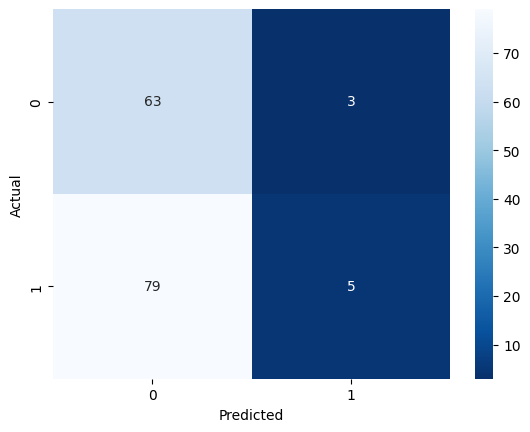

In [835]:
y_true = np.array(y_test)  # Реальные метки
y_probs = np.array(clf.predict_proba(X_test)[:, 1])  # Предсказанные вероятности

# Новый порог
new_threshold = 0.8  # Замените на ваш рассчитанный порог

# Применение нового порога для получения предсказанных классов
y_pred_new = (y_probs >= new_threshold).astype(int)

# Вычисление новой матрицы ошибок
cm_new = confusion_matrix(y_true, y_pred_new)
sns.heatmap(cm_new, annot=True, fmt='d', cmap='Blues_r');
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [836]:
accuracy = accuracy_score(y_test, y_pred_new)
recall = recall_score(y_test, y_pred_new) 
precision = precision_score(y_test, y_pred_new)

print('accuracy: ', round(accuracy, 3))
print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))

accuracy:  0.453
recall:  0.06
precision:  0.625


Как мы видим по матрице ошибок, значение TP значительно уменьшилось, но также ошибки FP стали равняться 3, что означает что модель практически никогда не присвоит значение 1, когда должна была присвоить значение 0, тоесть не сделает из 'не вкусного' молока - 'вкусное'.

Далее, с помощью обученной модели спрогнозируйте вкус молока коров, которых фермер хочет купить.

In [837]:
display(cow_buy.head())

порода тип_пастбища порода_папы_быка  имя_папы  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный   
2  РефлешнСоверинг    равнинное          Соверин     Барин   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный   

   текущая_жирность(%)  текущий_белок(%)      возраст        эке  \
0                 3.58             3.076  более_2_лет  15.354716   
1                 3.54             3.081  менее_2_лет  15.354716   
2                 3.59             3.074  более_2_лет  15.354716   
3                 3.40             3.061  более_2_лет  15.354716   
4                 3.64             3.074  более_2_лет  15.354716   

   сырой_протеин(г)       спо     удой(кг)  
0       2026.475459  0.960881  6647.158182  
1       2026.475459  0.960881  6352.150226  
2       2026.475459  0.960881  6304.235706  
3       2026.475459  0.960881  6608.131450  
4       2026.475459  0.960881  6554.542971

In [838]:
cow_buy_copy2 = cow_buy.copy()
#создадим копию, чтобы потом добавить значение удоя в оригинальную таблицу

In [839]:
cow_buy_copy2['спо_обработанное'] = cow_buy['спо'].apply(lambda x: 'менее_0.9' if x<0.9 else 'более_0.9')
# выведем 5 случайных строк
print(cow_buy_copy2['спо_обработанное'].sample(3))

cow_buy_copy2['эке_обработанная'] = cow_buy['эке'].apply(lambda x: x**2)
# выведем 5 случайных строк
print(cow_buy_copy2['эке_обработанная'].sample(3))

16    более_0.9
19    более_0.9
1     более_0.9
Name: спо_обработанное, dtype: object
11    235.767309
15    235.767309
10    235.767309
Name: эке_обработанная, dtype: float64


In [840]:
cow_buy_copy2 = cow_buy_copy2.drop(columns=['эке','спо'])
cow_buy_copy2 = cow_buy_copy2.rename(columns={'текущая_жирность(%)':'жирность(%)', 'текущий_белок(%)':'белок(%)'})
display(cow_buy_copy2.head(3))

порода тип_пастбища порода_папы_быка  имя_папы  жирность(%)  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес         3.58   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный         3.54   
2  РефлешнСоверинг    равнинное          Соверин     Барин         3.59   

   белок(%)      возраст  сырой_протеин(г)     удой(кг) спо_обработанное  \
0     3.076  более_2_лет       2026.475459  6647.158182        более_0.9   
1     3.081  менее_2_лет       2026.475459  6352.150226        более_0.9   
2     3.074  более_2_лет       2026.475459  6304.235706        более_0.9   

   эке_обработанная  
0        235.767309  
1        235.767309  
2        235.767309

In [841]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# создание константы RANDOM_STATE
RANDOM_STATE = 42

# сохранение выборок и деление данных на тренировочную и тестовую выборки:
X = ferma_main_total.drop(['удой(кг)', 'вкус_молока', 'эке', 'спо'], axis=1)
y = ferma_main_total['вкус_молока']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

# Преобразуем целевые значения в числовой формат
y_train = y_train.map({'не вкусно': 0, 'вкусно': 1}).astype(int)
y_test = y_test.map({'не вкусно': 0, 'вкусно': 1}).astype(int)

# список всех признаков
cat_col_names = ['спо_обработанное', 'порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'имя_папы']
num_col_names = ['жирность(%)', 'белок(%)', 'сырой_протеин(г)', 'эке_обработанная']

# Создание ColumnTransformer для обработки числовых и категориальных признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_col_names),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_col_names)
    ]
)

# Применение преобразований к тренировочным данным
X_train_transformed = preprocessor.fit_transform(X_train)

# Применение преобразований к новым данным (cow_buy_copy2)
X_test_transformed = preprocessor.transform(cow_buy_copy2)

# Получение имен признаков для обученной модели
cat_col_names_ohe = preprocessor.named_transformers_['cat'].get_feature_names_out()
all_col_names = list(cat_col_names_ohe) + num_col_names

# Преобразование в DataFrame для удобства работы
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=all_col_names)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=all_col_names)

# Обучение модели на тренировочных данных
clf.fit(X_train_transformed_df, y_train)

# Подготовка тестовых данных
# Используем X_test_transformed_df вместо cow_buy_3
cow_buy_3 = pd.DataFrame(X_test_transformed, columns=all_col_names)

# Использование модели для предсказаний
taste = (clf.predict_proba(cow_buy_3)[:, 1] >= 0.8).astype(int)

# Вывод результата
print(taste)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


По расчитанной модели все коровы дают не вкусное молоко

In [842]:
#добавим новый столбец 'вкус_молока' в основную таблицу cow_buy
cow_buy['вкус_молока'] = taste
cow_buy['вкус_молока'] = cow_buy['вкус_молока'].map({0: 'не вкусно', 1: 'вкусно'}).astype(str)
display(cow_buy.head(10))

порода тип_пастбища порода_папы_быка  имя_папы  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный   
2  РефлешнСоверинг    равнинное          Соверин     Барин   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный   
5  РефлешнСоверинг    равнинное          Соверин  Геркулес   
6   Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
7   Вис Бик Айдиал    равнинное          Соверин    Буйный   
8  РефлешнСоверинг    равнинное          Соверин     Барин   
9  РефлешнСоверинг    холмистое           Айдиал    Буйный   

   текущая_жирность(%)  текущий_белок(%)      возраст        эке  \
0                 3.58             3.076  более_2_лет  15.354716   
1                 3.54             3.081  менее_2_лет  15.354716   
2                 3.59             3.074  более_2_лет  15.354716   
3                 3.40             3.061  более_2_лет  15.354716   
4                 3.64             3.074  более_2_лет  15.354716   
5                 3.63             3.053  менее_2_лет  15.354716   
6                 3.58             3.076  более_2_лет  15.354716   
7                 3.57             3.079  более_2_лет  15.354716   
8                 3.59             3.074  более_2_лет  15.354716   
9                 3.40             3.079  менее_2_лет  15.354716   

   сырой_протеин(г)       спо     удой(кг) вкус_молока  
0       2026.475459  0.960881  6647.158182   не вкусно  
1       2026.475459  0.960881  6352.150226   не вкусно  
2       2026.475459  0.960881  6304.235706   не вкусно  
3       2026.475459  0.960881  6608.131450   не вкусно  
4       2026.475459  0.960881  6554.542971   не вкусно  
5       2026.475459  0.960881  6452.669868   не вкусно  
6       2026.475459  0.960881  6647.158182   не вкусно  
7       2026.475459  0.960881  6553.319157   не вкусно  
8       2026.475459  0.960881  6304.235706   не вкусно  
9       2026.475459  0.960881  6406.962519   не вкусно

In [843]:
#посмотрим на количество подходящих коров по 2м критериям
cow_buy.loc[(cow_buy['удой(кг)'] > 6000) & (cow_buy['вкус_молока'] == 'вкусно')]

Empty DataFrame
Columns: [порода, тип_пастбища, порода_папы_быка, имя_папы, текущая_жирность(%), текущий_белок(%), возраст, эке, сырой_протеин(г), спо, удой(кг), вкус_молока]
Index: []

Значит, следуя двум критериям, которые придъявлял фермер для новых коров, а именно 1ый - средний удой за год должен быть не менее 6000 килограммов, и 2й критерий - молоко должно быть вкусным, подходящих коров нет. Если все же фермеру небходимо купить коров, то мы можем изменить значение порога 0.8, тогда количесво подходящих коров увеличится, но также увеличится и шанс ошибки покупки коровы с невкусным молоком.

По итогу, в данном шаге работы мы обучили модель логистической регрессии и решили задачу классификации для датасета ferma_main. В данной модели мы уже приняли за целевой признак 'Вкус молока'. Так же, как и в приедыдущих шагах, мы обучили модель логистической регрессии на подготовленных данных, а так же оценили качество модели на тестовой выборке: рассчитали метрики accuracy, recall, precision и построили матрицу ошибок. Указали, что 'Вкусно' — это класс 1, 'Не вкусно' — класс 0. Получили значения accuracy: 0.646, precision: 0.647 и recall: 0.872. Из матрицы ошибок следует, что модель выдает True Positive в 75 случаях, False Positive в 41 случаях, False Negative в 11 случаях и True Negative в 20 случаях. Т.к. фермеру необходимо минимизировать ошибки, когда у купленной коровы 'не вкусное' молоко оказалось определенно как 'вкусное', значит нам необходимо уменьшить ошибки 1 рода, а именно ошибки False Positive и привести ее к нулю. Для этого мы изменили порог классификации, провели его анализ и ещё раз рассчитали значения метрик recall и precision. Самым оптимальным значением порога оказалось значение 0.838, при котором значение precision равняется 1.0, а ошибки False Positive сведены к нулю. При уменьшении ошибки False Positive точность модели немного упала, но теперь фермер точно не купит корову, дающее невкусное молоко. Далее, с помощью обученной модели мы спрогнозировали вкус молока коров, которых фермер хочет купить. По расчитанной модели все коровы дают не вкусное молоко. В итоге получается что нет ни одной коровы 'идеально' соответсвующей критериям фермера в том, что корова в среднем должна давать не менее 6000 кг удоя за год, и ее молоко должно быть 'вкусным'. Если все же фермеру небходимо купить корову, то мы можем изменить значение порога 0.8, тогда количесво подходящих коров увеличится, но также увеличится и шанс ошибки покупки коровы с невкусным молоком.



## Итоговые выводы

В данной работе мы выполняем на заказ проект по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма». Чтобы принять объективное решение о покупке бурёнок, нам необходимо получить модель машинного обучения, которая поможет фермеру управлять рисками сделать прогнозы и очень тщательно отобрать коров, подходящих его критериям. Он хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным. В наше распоряжение «ЭкоФерма» предоставила подробные данные о своих коровах, для дальнейших исследований, а фермер предоствил данные своего стада коров.

Мы создали две прогнозные модели для отбора бурёнок в поголовье фермера:
- первая прогнозирует возможный удой коровы (целевой признак Удой);
- вторая — рассчитывает вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

Для начала, мы прочитали исходные файлы с данными и выполнили их предобработку (заменили названия столбцов, изменили типы данных, проверили данные на наличие пропусков и дубликатов и т.д.). 

После, мы провели статистический анализ, определили к каким признакам отнясятся все данные и построили различные графики для количественных и категориальных признаков.

1) Количественные признаки:   
   
- в датафрейме ferma_main:   
    1) У признака 'удой (кг)' имеется аномальное значение приблизительно равное 45.000 кг молока, которое в последствии мы удалили. Также график выглядит как график нормального распределения.    
    2) У признака 'эке' по диаграмме размаха выбросов нет. Также, гистограмма похожа на график нормального распределения со смещением вправо.    
    3) У признака 'сырой протеин (г)' как видно по диаграмме размаха в данных выбросов нет. Гистограмма не похожа на график нормального распределения.    
    4) У признака 'спо' выбросов нет, и на графике мы видим не нормальное распределение.    
    5) У признака 'жирность (%)' по диаграмме размаха мы видим множество выбрасов. Мы убрали все значения меньше 3.2% жирности молока. Также, как мы можем заметить, гистограмма не похожа на график нормального распределения.    
    6) У признака 'белок (%)' присутсвуют выбросы в небольшом количестве, поэтому мы их удалили. Гистограмма же похожа на график нормального распределения.   
- в датафрейме ferma_dad их нет    
- в датафрейме cow_buy:     
    7) У признака 'текущая жирность (%) из графиков следует, что в данных нет аномальных значений. Это объясняется тем, что датафрейм состоит из небольшого количества данных. 
    8) У признака 'текущий белок (%)' в данных нет аномальных значений по той же причине что и у жирности.
   
2) Категориальные признаки:  
   
- в датафрейме ferma_main:   
    1) У признака 'порода' большее количество коров породы Вис Бик Айдиал равное 355, а РефлешнСоверинг их 244.   
    2) У признака 'тип пастбища' коров, которые пасутся на холмистом пастбище больше, чем на равнинном.    
    3) У признака 'порода папы быка' количество коров, у которых папа бык был породы Айдиал почти такое же, как и у которых папа бык был породы Соверин.    
    4) У признака 'вкус молока' , по мнению фермера, у его коров больше вкусного молока, чем не вкусного.   
    5) У признака 'возраст' количество коров, которым больше 2 лет, больше в 5 раз, недели коров, которым менее 2х лет.   
- в датафрейме ferma_dad:    
    6) У признака 'имя папы' больше всего у фермера было коров от быка Барин, а меньше всего от Геркулеса.   
- в датафрейме cow_buy:   
    7) У признака 'порода' у ЭкоФермы» количество коров породы РефлешнСоверинг чуть больше, чем породы Вис Бик Айдиал.   
    8) У признака 'тип пастбища' количество коров у «ЭкоФермы», которые пасутся на равнинном пастбище такое же, как и количество коров, которые пасутся на холмистом   
    9) У признака 'порода папы быка' количество коров, у которых папа бык был породы Соверин больше, чем у которых папа бык был породы Айдиал.   
    10) У признака 'имя папы' больше всего коров от быка по имени Буйный - 8 коров. Меньше всего коров от быков по имени Барин и Соловчик - 2 коровы   
    11) У признака 'возраст' коров страше 2х лет больше в 3 раза, чем коров, которые младше 2х лет.   

Далее, мы провели корреляционный анализ количественных признаков в датасете ferma_main.csv и изучили их взаимосвязь. Рассчитали коэффициенты корреляции между признаками, и судя по тепловой карте и графикам, большие значения коэффициета корреляции с целевым признаком 'Удой' наблюдаются у признаков 'ЭКЕ', 'СПО' и 'Возраст'. С признаками 'Сырой протеин', 'Порода папы быка' и Жирность (%) прослеживается умеренная корреляция. С 'Белком', 'Порода', Тип пастбища и 'Вкус молока' наблюдается cлабая корреляция.
Также мы построили диаграммы рассеяния между целевым признаком 'Удой' и всеми количественными признаками с учётом значения категориальных признаков. Линейная связь наблюдается между целевым признаком Удой и входными признаками ЭКЕ и Сырой протеин (г). Нелинейная связь наблюдается между целевым признаком Удой и входными признаками СПО, Жирность (%) и Белок (%). 

В наших данных мультиколлинеарность между входными признаками не наблюдается, т.к. как правило, о мультиколлинеарности говорят при значении коэффициента корреляции от 0.9 до 0.95 по модулю.У нас же, самые большие показатели коэффициента корреляции у "ЭКЕ" и "Сырого протеина", но даже их значения не близки к 0.9, чтобы была возможна мультиколлинеарность, т.е. между входными признаками нет очень сильной линейной взаимосвязи.

Также, в нашей работе мы обучили 3 модели линейной регрессии.
В каждой модели мы отобрали признаки, которые подходят для модели линейной регрессии. Разбили данные на тренировочную и тестовую выборки. Кодировали категориальные признаки с помощью OneHotEncoder. Отмасштабировали количественные признаки с помощью StandardScaler. Обучили модель линейной регрессии на подготовленных данных. 
Вдобавок, для каждой модели линейной регрессии и определения ее качества, мы рассчитали коэффициент детерминации R² и проанализировали остатки с помощью 3х графиков (гистограммы остатков, графика остатков относительно среднего, графика Q-Q plot для нормальности распределения).
Для второй модели мы произвели те же шаги, но еще мы исключили нелинейность, чтобы признаки были информативны для линейной регрессии. Чтобы устранить нелинейность мы преобразовали СПО в категориальный бинарный признак и поделили его на 2 категории: 'менее_0.9' и 'более_0.9', а значение ЭКЕ чтобы скомпенсировать возвели в квадрат.
В третьей модели, для улучшения модели линейной регрессии, мы добавили в данные новый входной признак 'Имя Папы' из датафрейма ferma_dad.csv и произвели все те же действия что и с первой и со второй моделями.
Потом мы сравнили качество трёх моделей линейной регрессии, сопоставьте их R² и остатки.

- Коэффициент детерминации R² у трех моделей:  
   
   - 1 модель: R² = 0.7240;
   - 2 модель: R² = 0.7408;
   - 3 модель: R² = 0.7560.
  
- Анализ остатков трех моделей:   
   
   - 1 модель: Остатки имеют асимметричное нормальное распределение с небольшим смещением влево относительно 0. Это означает, что модель дает немного большие предсказания, то есть её прогнозы чуть-чуть выше истинных значений. При анализе дисперсии ошибок можно заметить, что модель чаще или сильнее ошибается, предсказывая большой удой. Это говорит нам о неточности модели. По графику QQ остатки следуют модели нормального распределения.
  
   - 2 модель: Остатки имеют асимметричное нормальное распределение относительно 0. Это означает, что модель дает чуть большие предсказания, и её прогнозы немного больше истинных значений. Данная модель работает чуть более качественно чем первая. При анализе дисперсии ошибок ситуация никак не изменилась, дисперсия увеличивается по мере увеличения значений. На графике QQ ситуация так же осталась прижней. Остатки следуют модели нормального распределения.
  
   - 3 модель: Остатки имеют асимметричное нормальное распределение относительно 0. Распределение стало более стабильное по сравнению с предыдущей моделью. При анализе дисперсии ошибок ситуация не изменилась, дисперсия у остатков не постояна и увеличивается по мере увеличения значений. На графике QQ ситуация так же осталась прижней. Остатки следуют модели нормального распределения

Таким образом, можно сделать вывод, что исключение нелинейности между признаками, а также добавление новых признаков хорошо влияет на нашу модель, и делает ее более качественной, т.к. третья модель оказалась более точной.

Далее мы оценили качество каждой модели по трём метрикам: MSE, MAE, RMSE. И увидели, что из выведенных значений, 3 модель имеет наименьшие показатели из всех моделей. Поэтому она является самой точной моделью из трех. После, нашли доверительный интервал прогноза 3 модели и он оказался равен от 6140 до 6265.

И в завершении, с помощью 3 модели спрогнозировали удой коров, которых фермер хочет купить. Выполнили подготовку данных, аналогичную той, которую делали выше и в результате предсказанные значения удоя приняли значения в промежутке от 6125 - 6653 кг в год. Потенциально подходящих коров по количеству удоя 20 штук.

И в последнем шаге работы мы обучили модель логистической регрессии и решили задачу классификации для датасета ferma_main. В данной модели мы уже приняли за целевой признак 'Вкус молока'. Так же, как и в приедыдущих шагах, мы обучили модель логистической регрессии на подготовленных данных, а так же оценили качество модели на тестовой выборке: рассчитали метрики accuracy, recall, precision и построили матрицу ошибок.   
   
Указали, что 'Вкусно' — это класс 1, 'Не вкусно' — класс 0.  
Оценили качество модели на тестовой выборке рассчитав метрики accuracy, precision, recall и построив матрицу ошибок.  
- accuracy: 0.607, 
- precision: 0.611 
- recall: 0.821.
     
Из матрицы ошибок следует, что:  
в 69 случаях модель правильно отнесла вкусное молоко к категории 'вкусно' (TP: 1-1);  
в 44 случаях модель неправильно отнесла невкусное молоко к категории 'вкусно' (FP: 0-1);  
в 15 случаях модель неправильно отнесла вкусное молоко к категории ' не вкусно' (FN: 1-0);  
в 22 случаях модель правильно отнесла невкусное молоко к категории 'не вкусно' (TN: 0-0)   

Главное для фермера это вкусное молоко. Ему важно, чтобы среди купленных им коров не оказалось ни одной, которая дает невкусное молоко. Поэтому мы определили, что нам необходимо свести ошибку первого рода False Positive к нулю, так как она является критичной (ошибка, когда модель неправильно отнесла 'не вкусное' молоко к категории 'вкусно').

Чтобы свести критичную ошибку к нулю мы изменили порог классификации, провели анализ порога и ещё раз рассчитали значения метрик recall и precision. Самым оптимальным значением порога оказалось значение 0.8, при котором количество ошибок False Positive почти нулевое, и составляет 2% от общего числа наблюдений (или в нашем случае 3 ошибки). Также, мы  заметили, что с увеличением порога значение precision увеличивается, а значение recall уменьшается. При уменьшении ошибки False Positive точность модели немного упала, но теперь фермер точно не купит корову, дающую невкусное молоко. 

Улучшить модель логистической регрессии возможно так же, как и в случае с линейной регрессией, - добавлением дополнительных входных признаков

И в конце, с помощью обученной модели, мы спрогнозировали вкус молока коров, которых фермер хочет купить. По расчитанной модели 4 коровы дают вкусное молоко. В итоге получается что нет коровы 'идеально' соответсвующей критериям фермера в том, что корова в среднем должна давать не менее 6000 кг удоя за год, и ее молоко должно быть 'вкусным'. Если все же фермеру небходимо купить коров, то мы можем изменить значение порога 0.8, тогда количесво подходящих коров увеличится, но также увеличится и шанс ошибки покупки коровы с невкусным молоком. Возможно, если в исходном списке покупаемых коров их количество увеличится, то найдутся еще коровы, которые подойдут под критерии.